58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


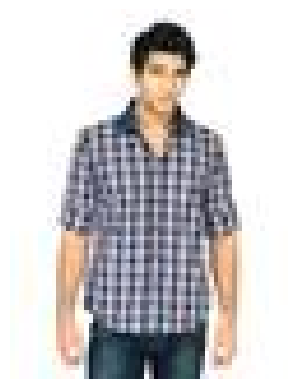

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Feature shape: (1, 7, 7, 512)


In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "styles_1000.csv"  # Update with your actual CSV path
df = pd.read_csv(csv_path)

# Define image directory
image_dir = "images"  # Update with actual image folder path

# Load the VGG16 model (pretrained on ImageNet)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Function to process images
def process_image(img_path):
    img = load_img(img_path, target_size=(224, 224))  # Load image & resize
    img_array = img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Normalize for VGG16
    return img_array

# Testing with one image
sample_img_path = os.path.join(image_dir, str(df.iloc[0]["id"]) + ".jpg")  # Pick first image
img_array = process_image(sample_img_path)

# Show image
plt.imshow(load_img(sample_img_path))
plt.axis("off")
plt.show()

# Extract features using VGG16
features = base_model.predict(img_array)
print("Feature shape:", features.shape)  # Should be (1, 7, 7, 512)


In [6]:
# Dictionary to store extracted features
features_dict = {}

# Loop through all images in the dataset
for index, row in df.iterrows():
    img_id = str(row["id"]) + ".jpg"  # Get image filename
    img_path = os.path.join(image_dir, img_id)  

    # Check if image exists
    if os.path.exists(img_path):
        img_array = process_image(img_path)  # Preprocess image
        features = base_model.predict(img_array)  # Extract features
        features_dict[row["id"]] = features.flatten()  # Flatten & store
    else:
        print(f"Image {img_id} not found!")

# Convert dictionary to DataFrame
features_df = pd.DataFrame.from_dict(features_dict, orient="index")

# Save features to a CSV file
features_df.to_csv("image_features.csv")

print("✅ Feature extraction complete! Features saved to 'image_features.csv'.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [7]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load extracted features
features_df = pd.read_csv("image_features.csv", index_col=0)

# Check feature shape
print(features_df.shape)  # Should be (num_images, feature_size)
print(features_df.head())  # Show first few rows


(958, 25088)
         0    1    2    3    4    5    6    7    8    9  ...  25078  25079  \
15970 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   
39386 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   
59263 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   
21379 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   
53759 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...   -0.0   -0.0   

       25080  25081  25082  25083  25084  25085  25086  25087  
15970   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  
39386   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  
59263   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  
21379   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  
53759   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0   -0.0  

[5 rows x 25088 columns]


In [8]:
def find_similar_clothes(image_id, top_n=5):
    # Get feature vector of selected image
    selected_features = features_df.loc[image_id].values.reshape(1, -1)

    # Compute similarity with all images
    similarity_scores = cosine_similarity(selected_features, features_df.values)

    # Get top N similar items (excluding the selected one)
    similar_indices = similarity_scores.argsort()[0][-top_n-1:-1][::-1]
    
    # Get matching item IDs
    similar_items = features_df.iloc[similar_indices].index.tolist()

    return similar_items

# Example: Find 5 most similar clothes for a random item
example_id = features_df.index[10]  # Pick a random item from dataset
similar_items = find_similar_clothes(example_id)

print(f"Items similar to {example_id}: {similar_items}")


Items similar to 9204: [9203, 23849, 41861, 20856, 12994]


In [11]:
df = pd.read_csv("styles_1000.csv")
print(df.columns)  # List all column names



Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [12]:
print(df["masterCategory"].unique())  # Check main categories
print(df["subCategory"].unique())  # Check subcategories


['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items']
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery' 'Lips' 'Saree'
 'Eyewear' 'Nails' 'Scarves' 'Dress' 'Loungewear and Nightwear' 'Wallets'
 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup' 'Free Gifts'
 'Ties' 'Accessories' 'Skin']


In [13]:
def get_matching_items(item_id, top_n=5):
    # Get selected item's details
    item_details = df[df["id"] == item_id].iloc[0]
    item_category = item_details["subCategory"]
    item_color = item_details["baseColour"]

    # Define matching rules
    if item_category in ["Topwear", "Dress", "Saree"]:
        matching_categories = ["Bottomwear", "Bags", "Jewellery", "Footwear"]
    elif item_category in ["Bottomwear"]:
        matching_categories = ["Topwear", "Footwear", "Accessories"]
    else:
        matching_categories = ["Accessories", "Footwear"]

    # Filter dataset for matching categories
    matching_items = df[df["subCategory"].isin(matching_categories)]

    # Filter by color compatibility
    matching_items = matching_items[matching_items["baseColour"] == item_color]

    # Get top N matching items
    matching_item_ids = matching_items["id"].sample(min(top_n, len(matching_items))).tolist()

    return matching_item_ids

# Example: Find matching items for a selected top (replace with any valid ID)
example_top_id = df[df["subCategory"] == "Topwear"]["id"].iloc[0]
matching_items = get_matching_items(example_top_id)

print(f"Matching items for {example_top_id}: {matching_items}")


Matching items for 15970: [23072, 17624, 40371, 34204]


In [17]:
print(df[df["id"] == 15970])  # Replace 15970 with the ID you're testing


def get_matching_items(item_id, top_n=5):
    item_details = df[df["id"] == item_id]
    if item_details.empty:
        print("Item ID not found!")
        return []
    
    item_details = item_details.iloc[0]
    item_category = item_details["subCategory"]
    item_color = get_similar_color(item_details["baseColour"])
    item_color_group = get_color_group(item_color)
    item_gender = item_details["gender"]

    # Filter dataset by same gender
    gender_filtered_df = df[df["gender"] == item_gender]
    print(f"Filtering items for gender: {item_gender} → Found {len(gender_filtered_df)} items.")

    if item_category == "Topwear":
        matching_categories = ["Bottomwear", "Bags", "Jewellery", "Footwear"]
        matching_items = gender_filtered_df[gender_filtered_df["subCategory"].isin(matching_categories)].copy()
        print(f"Matching categories: {matching_categories} → Found {len(matching_items)} items.")

        matching_items["colorGroup"] = matching_items["baseColour"].apply(get_color_group)
        bottomwear_items = matching_items[(matching_items["subCategory"] == "Bottomwear")]

        print(f"Bottomwear items before color filtering: {len(bottomwear_items)}")

        if item_color_group == "light":
            bottomwear_items = bottomwear_items[bottomwear_items["colorGroup"] == "dark"]
        elif item_color_group == "dark":
            bottomwear_items = bottomwear_items[bottomwear_items["colorGroup"] == "light"]

        print(f"Bottomwear items after color filtering: {len(bottomwear_items)}")

        chosen_bottomwear = bottomwear_items.sample(1) if not bottomwear_items.empty else None
        bottomwear_color = get_similar_color(chosen_bottomwear["baseColour"].values[0]) if chosen_bottomwear is not None else item_color

        accessory_items = matching_items[(matching_items["subCategory"].isin(["Bags", "Jewellery", "Footwear"]))]
        accessory_items = accessory_items[
            (accessory_items["baseColour"].apply(get_similar_color) == item_color) | 
            (accessory_items["baseColour"].apply(get_similar_color) == bottomwear_color)
        ]

        print(f"Accessory items after color filtering: {len(accessory_items)}")

        chosen_accessories = accessory_items.sample(min(3, len(accessory_items))) if not accessory_items.empty else None

        result = []
        if chosen_bottomwear is not None:
            result.append(int(chosen_bottomwear["id"].values[0]))
        if chosen_accessories is not None:
            result.extend(chosen_accessories["id"].tolist())

        print(f"Final recommended items: {result}")
        return result

    return []


      id gender masterCategory subCategory articleType baseColour season  \
0  15970    Men        Apparel     Topwear      Shirts  Navy Blue   Fall   

     year   usage                productDisplayName  
0  2011.0  Casual  Turtle Check Men Navy Blue Shirt  


In [18]:
print(df[(df["gender"] == "Men") & (df["subCategory"] == "Bottomwear")])


        id gender masterCategory subCategory  articleType baseColour  season  \
1    39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
3    21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
45   18005    Men        Apparel  Bottomwear       Shorts      Black  Summer   
65   54924    Men        Apparel  Bottomwear       Shorts       Blue  Summer   
157  10257    Men        Apparel  Bottomwear     Trousers      Black    Fall   
202  17624    Men        Apparel  Bottomwear  Track Pants  Navy Blue    Fall   
206  13284    Men        Apparel  Bottomwear       Shorts      Black    Fall   
209  26163    Men        Apparel  Bottomwear     Trousers       Grey  Summer   
312  34204    Men        Apparel  Bottomwear  Track Pants  Navy Blue    Fall   
322  16508    Men        Apparel  Bottomwear        Jeans       Blue    Fall   
346  13248    Men        Apparel  Bottomwear     Trousers      Brown    Fall   
383  11349    Men        Apparel  Bottom

In [19]:
df["colorGroup"] = df["baseColour"].apply(get_color_group)  
print(df[(df["gender"] == "Men") & (df["subCategory"] == "Bottomwear")]["colorGroup"].value_counts())


colorGroup
dark       15
neutral    11
light       3
Name: count, dtype: int64


In [20]:
print(get_color_group("Navy Blue"))


neutral


In [21]:
def get_color_group(color):
    dark_colors = {"Black", "Navy Blue", "Maroon", "Dark Green", "Brown", "Charcoal", "Dark Grey"}
    light_colors = {"White", "Beige", "Cream", "Light Grey", "Yellow", "Pink"}

    if color in dark_colors:
        return "dark"
    elif color in light_colors:
        return "light"
    else:
        return "neutral"  # Fallback for colors we haven't classified yet

df["colorGroup"] = df["baseColour"].apply(get_color_group)


In [22]:
print(get_color_group("Navy Blue"))


dark


In [23]:
print(df["colorGroup"].value_counts())


colorGroup
neutral    383
dark       366
light      209
Name: count, dtype: int64


In [25]:
print(df[df["colorGroup"] == "neutral"]["baseColour"].unique())


['Blue' 'Silver' 'Grey' 'Green' 'Purple' 'Bronze' 'Teal' 'Copper'
 'Off White' 'Red' 'Khaki' 'Orange' 'Coffee Brown' 'Gold' 'Steel' 'Tan'
 'Magenta' 'Lavender' 'Sea Green' 'Peach' 'Olive' 'Skin' 'Burgundy' 'Rust'
 'Multi' 'Grey Melange' 'Lime Green' 'Mauve' 'Turquoise Blue']


In [26]:
def get_color_group(color):
    dark_colors = {
        "Black", "Navy Blue", "Maroon", "Dark Green", "Brown", "Charcoal", "Dark Grey",
        "Olive", "Burgundy", "Mustard", "Blue", "Grey", "Green", "Purple", "Bronze",
        "Teal", "Copper", "Khaki", "Coffee Brown", "Rust", "Mauve"
    }
    
    light_colors = {
        "White", "Beige", "Cream", "Light Grey", "Yellow", "Pink", "Sky Blue", "Peach",
        "Silver", "Off White", "Lavender", "Steel", "Tan", "Magenta", "Sea Green",
        "Skin", "Turquoise Blue", "Lime Green"
    }

    if color in dark_colors:
        return "dark"
    elif color in light_colors:
        return "light"
    else:
        return "neutral"  # Red, Orange, Gold, Multi, etc.

df["colorGroup"] = df["baseColour"].apply(get_color_group)


In [27]:
print(df[df["colorGroup"] == "neutral"]["baseColour"].unique())


['Red' 'Orange' 'Gold' 'Multi' 'Grey Melange']


In [33]:
print(df["colorGroup"].value_counts())


colorGroup
dark       612
light      269
neutral     77
Name: count, dtype: int64


In [34]:
print(df[df["id"] == 15970])


      id gender masterCategory subCategory articleType baseColour season  \
0  15970    Men        Apparel     Topwear      Shirts  Navy Blue   Fall   

     year   usage                productDisplayName colorGroup  
0  2011.0  Casual  Turtle Check Men Navy Blue Shirt       dark  


In [36]:
def find_matching_items(item_id):
    # Get selected item details
    item = df[df["id"] == item_id]
    if item.empty:
        return []

    item_color = item["colorGroup"].values[0]
    item_category = item["subCategory"].values[0]
    item_gender = item["gender"].values[0]

    matching_items = []

    # 1️⃣ Find bottomwear with opposite color group (dark/light pairing)
    if item_category == "Topwear":
        opposite_color = "light" if item_color == "dark" else "dark"
        bottomwear = df[
            (df["subCategory"] == "Bottomwear") &
            (df["colorGroup"] == opposite_color) &
            (df["gender"] == item_gender)
        ]
        matching_items.extend(bottomwear["id"].tolist())

    # 2️⃣ Find accessories/bags matching either topwear or bottomwear color
    accessories = df[
        (df["subCategory"].isin(["Bags", "Accessories"])) &
        (df["colorGroup"].isin([item_color])) &  # Matches topwear color
        (df["gender"] == item_gender)
    ]
    matching_items.extend(accessories["id"].tolist())

    return matching_items[:5]  # Return top 5 matches for now


In [37]:
print(df[df["id"].isin(find_matching_items(15970))])


        id gender masterCategory subCategory articleType baseColour  season  \
435  56822    Men        Apparel  Bottomwear    Trousers      Beige  Summer   
478  27614    Men        Apparel  Bottomwear    Trousers      Beige  Summer   
931  30453    Men        Apparel  Bottomwear       Jeans      White  Summer   

       year   usage             productDisplayName colorGroup  
435  2012.0  Casual  John Players Men Beige Shorts      light  
478  2012.0  Casual    Scullers Men Beige Trousers      light  
931  2012.0  Casual        Deni Yo Men White Jeans      light  


In [38]:
print(df[df["id"].isin(find_matching_items(15970)) & df["subCategory"].isin(["Bags", "Accessories"])])


Empty DataFrame
Columns: [id, gender, masterCategory, subCategory, articleType, baseColour, season, year, usage, productDisplayName, colorGroup]
Index: []


In [39]:
print(df[(df["subCategory"].isin(["Bags", "Accessories"])) & (df["colorGroup"] == "dark")])


        id  gender masterCategory  subCategory       articleType baseColour  \
13   47957   Women    Accessories         Bags          Handbags       Blue   
18   47359   Women    Accessories         Bags          Handbags      Brown   
28   21977   Women    Accessories         Bags          Handbags      Brown   
36   29742   Women    Accessories         Bags          Handbags       Teal   
67   35913   Women    Accessories         Bags          Handbags      Black   
114  31923   Women    Accessories         Bags          Handbags       Blue   
131  58177   Women    Accessories         Bags          Handbags      Brown   
138  12732  Unisex    Accessories         Bags         Backpacks      Black   
177  21948   Women    Accessories         Bags          Handbags      Brown   
187  47366   Women    Accessories         Bags          Handbags       Blue   
197   9009   Women    Accessories         Bags          Handbags      Brown   
291  20604   Women    Accessories         Bags      

In [40]:
def find_matching_items(item_id):
    item = df[df["id"] == item_id].iloc[0]  # Get the selected item
    topwear_color_group = item["colorGroup"]
    
    if item["subCategory"] == "Topwear":
        # 1️⃣ Find bottomwear with the opposite color (dark ↔ light)
        bottomwear = df[
            (df["subCategory"] == "Bottomwear") & 
            (df["colorGroup"] != topwear_color_group) & 
            (df["gender"] == item["gender"])
        ]
        
        # 2️⃣ Find accessories and bags that match the topwear color
        accessories_bags = df[
            (df["subCategory"].isin(["Bags", "Accessories"])) & 
            (df["colorGroup"] == topwear_color_group) & 
            (df["gender"] == item["gender"])
        ]
        
        # Combine results
        matched_items = pd.concat([bottomwear, accessories_bags])
        
        return matched_items["id"].tolist()


In [41]:
print(find_matching_items(15970))


[56822, 27614, 30453]


In [42]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("styles_1000.csv")

# Function to filter recommendations by gender
def filter_by_gender(input_product_id, recommended_products):
    """
    Filters recommended products to match the same gender category as the input product.
    
    Parameters:
        input_product_id (int): The ID of the input product.
        recommended_products (DataFrame): The DataFrame containing recommended products.
    
    Returns:
        DataFrame: Filtered recommendations with gender-matching logic applied.
    """
    # Get gender of the input product
    input_product_row = df[df['id'] == input_product_id]

    # If the product ID doesn't exist, return an empty DataFrame
    if input_product_row.empty:
        print(f"Product ID {input_product_id} not found!")
        return pd.DataFrame()

    input_gender = input_product_row['gender'].values[0]

    # If the product is unisex, return all recommendations
    if input_gender == "unisex":
        return recommended_products  

    # Otherwise, filter recommendations to match the same gender (or unisex)
    filtered_recommendations = recommended_products[
        recommended_products['gender'].apply(lambda g: g == input_gender or g == "unisex")
    ]

    return filtered_recommendations

# Example usage
if __name__ == "__main__":
    # Simulated recommended products DataFrame (Replace with actual recommendations later)
    recommended_products = pd.DataFrame({
        'id': [101, 102, 103, 104, 105],
        'gender': ['men', 'women', 'unisex', 'boys', 'men']  # Example genders
    })

    input_product_id = 101  # Example input product ID

    filtered_results = filter_by_gender(input_product_id, recommended_products)
    print(filtered_results)  # This should only return 'men' and 'unisex' products


Product ID 101 not found!
Empty DataFrame
Columns: []
Index: []


In [43]:
import pandas as pd

df = pd.read_csv("styles_1000.csv")
print(df.columns)  # Show all column names


Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [44]:
print(df[df['id'] == 101])  # Check if ID 101 is in the dataset


Empty DataFrame
Columns: [id, gender, masterCategory, subCategory, articleType, baseColour, season, year, usage, productDisplayName]
Index: []


In [45]:
print(df['id'].head(10))  # Show the first 10 IDs


0    15970
1    39386
2    59263
3    21379
4    53759
5     1855
6    30805
7    26960
8    29114
9    30039
Name: id, dtype: int64


In [46]:
valid_product_id = 15970  # Replace with any valid ID from your list

product_info = df[df['id'] == valid_product_id]
print(product_info)


      id gender masterCategory subCategory articleType baseColour season  \
0  15970    Men        Apparel     Topwear      Shirts  Navy Blue   Fall   

     year   usage                productDisplayName  
0  2011.0  Casual  Turtle Check Men Navy Blue Shirt  


In [47]:
import pandas as pd

# Load the dataset (assuming it's already loaded as df)
df = pd.read_csv("styles_1000.csv")

# Function to find matching items based on gender and base color
def find_matching_items(product_id, df):
    product_info = df[df['id'] == product_id]

    if product_info.empty:
        print(f"Product ID {product_id} not found!")
        return None

    product_gender = product_info['gender'].values[0]
    product_baseColour = product_info['baseColour'].values[0]

    # Get matching products with the same gender or unisex
    matching_items = df[
        ((df['gender'] == product_gender) | (df['gender'] == "Unisex")) &
        (df['baseColour'] == product_baseColour) &
        (df['id'] != product_id)  # Exclude the same product
    ]

    return matching_items

# Example usage
product_id = 15970  # Change this to test other products
matching_results = find_matching_items(product_id, df)

print(matching_results)


        id  gender masterCategory subCategory     articleType baseColour  \
8    29114     Men    Accessories       Socks           Socks  Navy Blue   
26    7990     Men        Apparel     Topwear         Tshirts  Navy Blue   
29   37812     Men        Apparel     Topwear          Shirts  Navy Blue   
101   8746  Unisex       Footwear  Flip Flops      Flip Flops  Navy Blue   
151  10859     Men        Apparel     Topwear         Tshirts  Navy Blue   
158  24062     Men        Apparel     Topwear         Tshirts  Navy Blue   
188   6041     Men        Apparel     Topwear         Tshirts  Navy Blue   
198   3533     Men        Apparel     Topwear         Tshirts  Navy Blue   
202  17624     Men        Apparel  Bottomwear     Track Pants  Navy Blue   
253   7355     Men        Apparel     Topwear         Tshirts  Navy Blue   
271  20260     Men        Apparel     Topwear         Tshirts  Navy Blue   
278   8779     Men        Apparel     Topwear          Shirts  Navy Blue   
307  22361  

In [51]:
import os

# Define the path to your images directory
image_directory = "D:/MLPROJECT/images"  # Replace this with your actual path to the images directory

# List all image files in the directory
image_extensions = ('.jpg', '.jpeg', '.png', '.gif')  # Add other extensions if needed
image_paths = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith(image_extensions)]

# Generate unique image IDs (or use the file name without extension)
image_ids = [os.path.splitext(os.path.basename(img))[0] for img in image_paths]

# Print the paths and IDs to verify
for img_id, img_path in zip(image_ids, image_paths):
    print(f"Image ID: {img_id}, Image Path: {img_path}")


Image ID: 10054, Image Path: D:/MLPROJECT/images\10054.jpg
Image ID: 10062, Image Path: D:/MLPROJECT/images\10062.jpg
Image ID: 10065, Image Path: D:/MLPROJECT/images\10065.jpg
Image ID: 10096, Image Path: D:/MLPROJECT/images\10096.jpg
Image ID: 10250, Image Path: D:/MLPROJECT/images\10250.jpg
Image ID: 10257, Image Path: D:/MLPROJECT/images\10257.jpg
Image ID: 10259, Image Path: D:/MLPROJECT/images\10259.jpg
Image ID: 10266, Image Path: D:/MLPROJECT/images\10266.jpg
Image ID: 10268, Image Path: D:/MLPROJECT/images\10268.jpg
Image ID: 10292, Image Path: D:/MLPROJECT/images\10292.jpg
Image ID: 10401, Image Path: D:/MLPROJECT/images\10401.jpg
Image ID: 10406, Image Path: D:/MLPROJECT/images\10406.jpg
Image ID: 10430, Image Path: D:/MLPROJECT/images\10430.jpg
Image ID: 10439, Image Path: D:/MLPROJECT/images\10439.jpg
Image ID: 10633, Image Path: D:/MLPROJECT/images\10633.jpg
Image ID: 10634, Image Path: D:/MLPROJECT/images\10634.jpg
Image ID: 10857, Image Path: D:/MLPROJECT/images\10857.j

In [53]:
# Define your extract_features function (as mentioned earlier)
# Make sure you have the function defined before this step

# Extract features from each image
extracted_features = [extract_features(img) for img in image_paths]

# Store extracted features in a dictionary
image_features = {img_id: feature for img_id, feature in zip(image_ids, extracted_features)}


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [54]:
import os
import numpy as np
import pickle
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the pre-trained model
model = VGG16(weights='imagenet', include_top=False)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Preprocess for VGG16
    features = model.predict(img_array)  # Extract features
    return features.flatten()  # Flatten to 1D vector

# Define the path to your images directory
image_directory = "D:/MLPROJECT/images"  # Update this with your actual path

# List all image files in the directory
image_extensions = ('.jpg', '.jpeg', '.png', '.gif')
image_paths = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith(image_extensions)]

# Generate unique image IDs
image_ids = [os.path.splitext(os.path.basename(img))[0] for img in image_paths]

# Extract features from each image
extracted_features = [extract_features(img) for img in image_paths]

# Store extracted features in a dictionary
image_features = {img_id: feature for img_id, feature in zip(image_ids, extracted_features)}

# Save the extracted features to a .pkl file
with open('image_features.pkl', 'wb') as file:
    pickle.dump(image_features, file)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [55]:
import pickle

# Load the extracted features from the .pkl file
with open('image_features.pkl', 'rb') as file:
    image_features = pickle.load(file)


In [56]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to get similar items based on features
def get_similar_items(image_id, image_features, top_n=5):
    # Get the feature vector for the given image_id
    feature_vector = image_features[image_id].reshape(1, -1)  # Reshape for compatibility
    similarities = cosine_similarity(feature_vector, list(image_features.values()))
    
    # Get the indices of the most similar images
    similar_indices = similarities[0].argsort()[-top_n-1:-1][::-1]
    similar_items = [(list(image_features.keys())[i], similarities[0][i]) for i in similar_indices]
    
    return similar_items


In [60]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import pickle

# Function to extract dominant color from an image
def extract_dominant_color(image_path, k=1):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixels = img.reshape(-1, 3)

    # Apply K-means clustering to find the most dominant color
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Get the most dominant color
    dominant_color = kmeans.cluster_centers_.astype(int)[0]
    return tuple(dominant_color)

# Function to generate metadata for images in a specified directory
def generate_metadata(image_directory):
    metadata = {}
    for filename in os.listdir(image_directory):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            image_id = os.path.splitext(filename)[0]  # Use the filename without extension as the ID
            image_path = os.path.join(image_directory, filename)
            dominant_color = extract_dominant_color(image_path)
            metadata[image_id] = {'category': 'unknown', 'color': dominant_color}  # Assign category as 'unknown'
    return metadata

# Specify the directory containing your images
image_directory = "D:/MLPROJECT/images"  # Update this with your actual path

# Generate metadata for the images
metadata = generate_metadata(image_directory)

# Save metadata to a .pkl file for future use
with open('metadata.pkl', 'wb') as file:
    pickle.dump(metadata, file)

print("Metadata generation complete! Metadata saved to 'metadata.pkl'.")


Metadata generation complete! Metadata saved to 'metadata.pkl'.


In [61]:
with open('metadata.pkl', 'rb') as file:
    metadata = pickle.load(file)


In [62]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to get similar items based on image features
def get_similar_items(image_id, image_features, top_n=5):
    if image_id not in image_features:
        return []

    # Get the feature vector for the input image
    input_feature = image_features[image_id].reshape(1, -1)

    # Calculate cosine similarity with all other images
    similarities = cosine_similarity(input_feature, list(image_features.values()))

    # Get the indices of the most similar items
    similar_indices = similarities.argsort()[0][-top_n-1:-1][::-1]

    # Return the top similar items (excluding the input image itself)
    return [(list(image_features.keys())[i], similarities[0][i]) for i in similar_indices]


In [63]:
# Function to get recommended items based on color and category
def get_filtered_recommendations(image_id, image_features, metadata, top_n=5):
    similar_items = get_similar_items(image_id, image_features, top_n=10)
    filtered_items = []

    # Get the category and color of the selected image
    selected_meta = metadata[image_id]

    for item_id, _ in similar_items:
        if (metadata[item_id]['category'] == selected_meta['category'] or
            metadata[item_id]['color'] == selected_meta['color']):
            filtered_items.append(item_id)

        if len(filtered_items) >= top_n:
            break

    return filtered_items


In [66]:
image_id_to_test = '3534'  # Replace this with a valid image ID from your dataset
recommendations = get_filtered_recommendations(image_id_to_test, image_features, metadata, top_n=5)
print(f"Recommendations for {image_id_to_test}: {recommendations}")


Recommendations for 3534: ['3701', '59060', '33214', '5865', '31312']


In [67]:
import os
import pandas as pd
from keras.preprocessing import image
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions


In [69]:
# Load pre-trained model
model = MobileNet(weights='imagenet')

def extract_category(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=1)[0]
    return decoded_preds[0][1]  # Return the predicted category

def extract_color(img_path):
    img = image.load_img(img_path)
    img = img.resize((100, 100))  # Resize to reduce complexity
    img_array = np.array(img)
    
    # Reshape the image array and perform KMeans
    pixels = img_array.reshape(-1, 3)
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(pixels)
    
    # Get the most common color
    colors = Counter(kmeans.labels_)
    most_common_color = colors.most_common(1)[0][0]
    return most_common_color  # Return color label or hex value based on clustering

# Directory containing your images
image_directory = 'images'
metadata = {}

for img_file in os.listdir(image_directory):
    if img_file.endswith(('.jpg', '.jpeg', '.png')):  # Check for valid image file types
        img_path = os.path.join(image_directory, img_file)
        category = extract_category(img_path)
        color = extract_color(img_path)
        
        # Store metadata
        metadata[img_file] = {'category': category, 'color': color}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 

In [70]:
# Save metadata to a DataFrame and then to a CSV file
metadata_df = pd.DataFrame.from_dict(metadata, orient='index')

# Save as CSV
metadata_df.to_csv('metadata.csv', index=False)

# Optionally, save as a pickle file
metadata_df.to_pickle('metadata.pkl')


In [74]:
import pandas as pd

# Load the metadata
metadata_df = pd.read_csv('metadata.csv')

# Add a unique identifier for each image (if there's no image identifier)
metadata_df['image_id'] = metadata_df.index  # Create a unique ID based on the index

# Now set the 'image_id' as the index
metadata_df.set_index('image_id', inplace=True)


In [75]:
# Save the updated metadata to a new CSV file
metadata_df.to_csv('updated_metadata.csv')

# Optionally, save as a pickle file
metadata_df.to_pickle('updated_metadata.pkl')


In [76]:
# Load the new updated metadata
metadata = pd.read_csv('updated_metadata.csv', index_col=0).to_dict(orient='index')


In [77]:
print(metadata_df.head())  # Display the first few rows of the updated metadata


                  category  color
image_id                         
0                   jersey      1
1         bulletproof_vest      1
2                 bearskin      1
3                     clog      0
4                  mailbag      1


In [78]:
# Save the updated metadata to a new CSV file
metadata_df.to_csv('updated_metadata.csv')

# Optionally, save as a pickle file
metadata_df.to_pickle('updated_metadata.pkl')


In [79]:
# Load the new updated metadata
metadata = pd.read_csv('updated_metadata.csv', index_col=0).to_dict(orient='index')


In [80]:
def get_filtered_recommendations(selected_image_id, image_features, metadata, top_n=5):
    similar_items = get_similar_items(selected_image_id, image_features, top_n=10)  # Ensure this function is defined
    filtered_items = []

    # Get the category and color of the selected image
    selected_meta = metadata[selected_image_id]

    for item_id, _ in similar_items:
        item_meta = metadata[item_id]
        
        # Check if category or color matches
        if (item_meta['category'] == selected_meta['category'] or
            item_meta['color'] == selected_meta['color']):
            filtered_items.append(item_id)

        if len(filtered_items) >= top_n:
            break

    return filtered_items


In [81]:
# Test the recommendation function
sample_image_id = 0  # Replace with an actual image ID from your updated metadata
recommended_items = get_filtered_recommendations(sample_image_id, image_features, metadata)
print(recommended_items)


[]


In [82]:
import pickle
import pandas as pd

# Load image features from the pickle file
with open('image_features.pkl', 'rb') as f:
    image_features = pickle.load(f)

# Alternatively, load from the CSV
# image_features = pd.read_csv('image_features.csv', index_col=0).to_dict(orient='index')


In [83]:
# Load updated metadata from the pickle file
with open('updated_metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

# Alternatively, load from the CSV
# metadata = pd.read_csv('updated_metadata.csv', index_col=0).to_dict(orient='index')


In [84]:
# Check image features
print("Image Features Sample:", list(image_features.items())[:5])  # Print first 5 entries

# Check metadata
print("Metadata Sample:", list(metadata.items())[:5])  # Print first 5 entries


Image Features Sample: [('10054', array([-0., -0., -0., ..., -0., -0., -0.], dtype=float32)), ('10062', array([-0., -0., -0., ..., -0., -0., -0.], dtype=float32)), ('10065', array([-0., -0., -0., ..., -0., -0., -0.], dtype=float32)), ('10096', array([-0., -0., -0., ..., -0., -0., -0.], dtype=float32)), ('10250', array([-0., -0., -0., ..., -0., -0., -0.], dtype=float32))]
Metadata Sample: [('category', image_id
0                jersey
1      bulletproof_vest
2              bearskin
3                  clog
4               mailbag
             ...       
953          sweatshirt
954          sweatshirt
955              jersey
956          sweatshirt
957              jersey
Name: category, Length: 958, dtype: object), ('color', image_id
0      1
1      1
2      1
3      0
4      1
      ..
953    1
954    0
955    1
956    0
957    1
Name: color, Length: 958, dtype: int64)]


In [92]:
# Assuming metadata is a dictionary where keys are image IDs
image_ids = list(metadata.keys())
print("Available Image IDs:", image_ids)


Available Image IDs: ['category', 'color']


In [93]:
# Print the entire metadata dictionary to understand its structure
print(metadata)


                  category  color
image_id                         
0                   jersey      1
1         bulletproof_vest      1
2                 bearskin      1
3                     clog      0
4                  mailbag      1
...                    ...    ...
953             sweatshirt      1
954             sweatshirt      0
955                 jersey      1
956             sweatshirt      0
957                 jersey      1

[958 rows x 2 columns]


In [95]:
# Assuming metadata is a DataFrame as shown
image_ids = metadata.index.tolist()  # Get the image IDs from the index
print("Available Image IDs:", image_ids)


Available Image IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217

In [98]:
for image_id in subset_ids:
    img_path = f"D:\\MLPROJECT\\images\\{image_id}.jpg"  # Adjust the path as needed
    print(f"Loading image from: {img_path}")  # Add this line
    ...


Loading image from: D:\MLPROJECT\images\0.jpg
Loading image from: D:\MLPROJECT\images\1.jpg
Loading image from: D:\MLPROJECT\images\2.jpg
Loading image from: D:\MLPROJECT\images\3.jpg
Loading image from: D:\MLPROJECT\images\4.jpg
Loading image from: D:\MLPROJECT\images\5.jpg
Loading image from: D:\MLPROJECT\images\6.jpg
Loading image from: D:\MLPROJECT\images\7.jpg
Loading image from: D:\MLPROJECT\images\8.jpg
Loading image from: D:\MLPROJECT\images\9.jpg
Loading image from: D:\MLPROJECT\images\10.jpg
Loading image from: D:\MLPROJECT\images\11.jpg
Loading image from: D:\MLPROJECT\images\12.jpg
Loading image from: D:\MLPROJECT\images\13.jpg
Loading image from: D:\MLPROJECT\images\14.jpg
Loading image from: D:\MLPROJECT\images\15.jpg
Loading image from: D:\MLPROJECT\images\16.jpg
Loading image from: D:\MLPROJECT\images\17.jpg
Loading image from: D:\MLPROJECT\images\18.jpg
Loading image from: D:\MLPROJECT\images\19.jpg
Loading image from: D:\MLPROJECT\images\20.jpg
Loading image from: D:\

In [99]:
for image_id in subset_ids:
    img_path = f"D:\\MLPROJECT\\images\\{image_id}.jpg"  # Adjust the path as needed
    try:
        img = load_img(img_path, target_size=(224, 224))  # Resize the image
        img_array = img_to_array(img) / 255.0  # Normalize the pixel values
        images.append(img_array)
        labels.append(metadata.loc[image_id, 'color'])  # Use color as the label
    except FileNotFoundError:
        print(f"File not found: {img_path}. Skipping.")


File not found: D:\MLPROJECT\images\0.jpg. Skipping.
File not found: D:\MLPROJECT\images\1.jpg. Skipping.
File not found: D:\MLPROJECT\images\2.jpg. Skipping.
File not found: D:\MLPROJECT\images\3.jpg. Skipping.
File not found: D:\MLPROJECT\images\4.jpg. Skipping.
File not found: D:\MLPROJECT\images\5.jpg. Skipping.
File not found: D:\MLPROJECT\images\6.jpg. Skipping.
File not found: D:\MLPROJECT\images\7.jpg. Skipping.
File not found: D:\MLPROJECT\images\8.jpg. Skipping.
File not found: D:\MLPROJECT\images\9.jpg. Skipping.
File not found: D:\MLPROJECT\images\10.jpg. Skipping.
File not found: D:\MLPROJECT\images\11.jpg. Skipping.
File not found: D:\MLPROJECT\images\12.jpg. Skipping.
File not found: D:\MLPROJECT\images\13.jpg. Skipping.
File not found: D:\MLPROJECT\images\14.jpg. Skipping.
File not found: D:\MLPROJECT\images\15.jpg. Skipping.
File not found: D:\MLPROJECT\images\16.jpg. Skipping.
File not found: D:\MLPROJECT\images\17.jpg. Skipping.
File not found: D:\MLPROJECT\images\18

In [102]:
import os

# List all files in the images directory
image_dir = 'D:\\MLPROJECT\\images'
files = os.listdir(image_dir)
print("Files in images directory:", files)


Files in images directory: ['10054.jpg', '10062.jpg', '10065.jpg', '10096.jpg', '10250.jpg', '10257.jpg', '10259.jpg', '10266.jpg', '10268.jpg', '10292.jpg', '10401.jpg', '10406.jpg', '10430.jpg', '10439.jpg', '10633.jpg', '10634.jpg', '10857.jpg', '10859.jpg', '10861.jpg', '10866.jpg', '11143.jpg', '11144.jpg', '11172.jpg', '11188.jpg', '11340.jpg', '11349.jpg', '11371.jpg', '11376.jpg', '11382.jpg', '11385.jpg', '11516.jpg', '11518.jpg', '11520.jpg', '11527.jpg', '11529.jpg', '11712.jpg', '11724.jpg', '11940.jpg', '11947.jpg', '11971.jpg', '11978.jpg', '11985.jpg', '12163.jpg', '12164.jpg', '12190.jpg', '12197.jpg', '12358.jpg', '12369.jpg', '12393.jpg', '12500.jpg', '12507.jpg', '12531.jpg', '12538.jpg', '12703.jpg', '12732.jpg', '12735.jpg', '12956.jpg', '12958.jpg', '12960.jpg', '12967.jpg', '12993.jpg', '12994.jpg', '13042.jpg', '13045.jpg', '13073.jpg', '13089.jpg', '13241.jpg', '13248.jpg', '13270.jpg', '13283.jpg', '13284.jpg', '13417.jpg', '13419.jpg', '13421.jpg', '13426.jpg

In [113]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load your metadata
metadata = pd.read_csv('updated_metadata.csv')

# Choose an image ID to test (replace with a valid ID)
image_id = r'D:\MLPROJECT\images\956.jpg'  # E.g., '0', '1', ..., '999'
img_path = r"D:\MLPROJECT\images\{image_id}.jpg"  # Ensure this image exists

# Load and preprocess the image
img = load_img(img_path, target_size=(224, 224))  # Resize the image
img_array = img_to_array(img) / 255.0  # Normalize the pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Assuming you have a trained model already in memory
# Make a prediction (use your model variable name here)
predicted_color = model.predict(img_array)  # Replace 'model' with your actual model variable
predicted_color_label = np.argmax(predicted_color, axis=1)  # Adjust if needed based on your output

# Retrieve the corresponding clothing items from metadata based on predicted color
recommended_items = metadata[metadata['color'] == predicted_color_label[0]]

print("Recommended items for the input image:")
print(recommended_items)


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\MLPROJECT\\images\\{image_id}.jpg'

In [110]:
print(metadata['image_id'].unique())  # Replace 'image_id' with the actual column name in your metadata


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [111]:
test_image_path = f"D:\\MLPROJECT\\images\\{956}.jpg"
print("Trying to load image from:", test_image_path)


Trying to load image from: D:\MLPROJECT\images\956.jpg


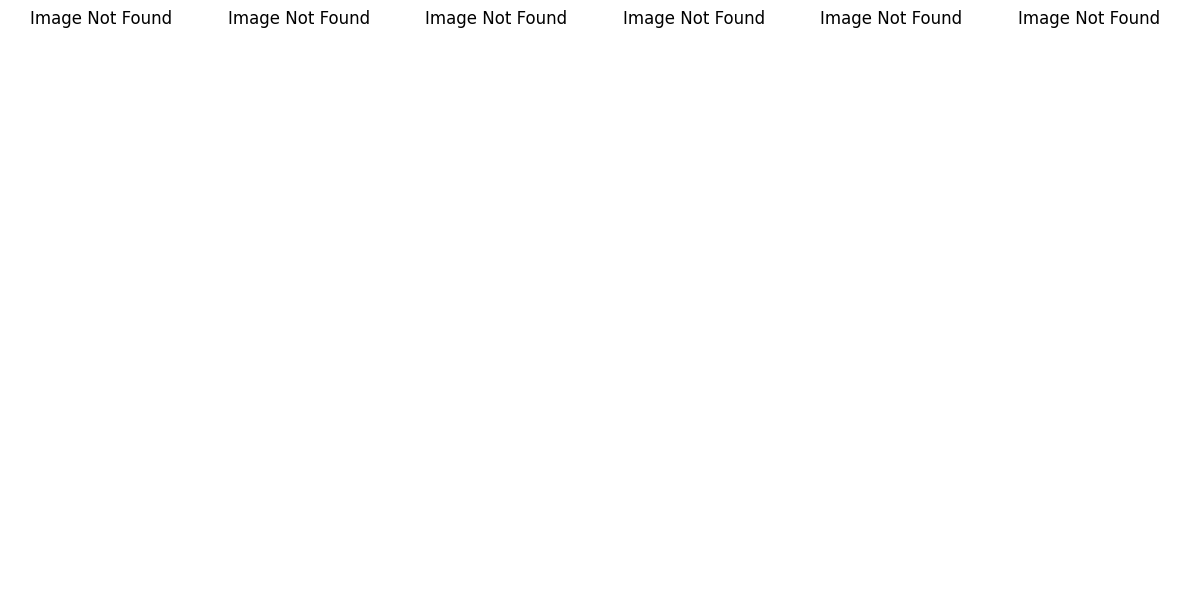

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load metadata
metadata = pd.read_csv('updated_metadata.csv')

# Define number of recommendations
num_recommendations = 5

# Path to images folder
image_folder = 'images/'

def get_recommendations(input_id, metadata, num_recommendations=5):
    """Get recommended items based on category and color."""
    input_data = metadata[metadata['image_id'] == input_id]
    
    if input_data.empty:
        return None, None  # Handle case where input_id is not found
    
    input_category = input_data['category'].values[0]
    input_color = input_data['color'].values[0]

    # Filter recommendations based on same category and color
    recommendations = metadata[(metadata['category'] == input_category) & (metadata['color'] == input_color)]

    # Randomly select up to `num_recommendations`
    recommendations = recommendations.sample(n=min(num_recommendations, len(recommendations)))

    return input_id, recommendations

# Choose a random image_id from metadata
input_id = random.choice(metadata['image_id'].tolist())

# Get recommendations
input_image_id, recommendations = get_recommendations(input_id, metadata)

# Display images if recommendations exist
if recommendations is not None:
    plt.figure(figsize=(12, 6))

    # Show input image
    plt.subplot(1, num_recommendations + 1, 1)
    
    input_image_path = os.path.join(image_folder, f"{input_image_id}.jpg")  # Ensure correct filename
    if os.path.exists(input_image_path):
        img_input = mpimg.imread(input_image_path)
        plt.imshow(img_input)
        plt.title(f'Input: {input_image_id}')
        plt.axis('off')
    else:
        plt.title("Image Not Found")
        plt.axis('off')

    # Show recommended images
    for i, row in enumerate(recommendations.itertuples(), 2):
        rec_image_path = os.path.join(image_folder, f"{row.image_id}.jpg")  # Ensure correct filename
        
        plt.subplot(1, num_recommendations + 1, i)
        if os.path.exists(rec_image_path):
            img_rec = mpimg.imread(rec_image_path)
            plt.imshow(img_rec)
            plt.title(f'Rec: {row.image_id}')
            plt.axis('off')
        else:
            plt.title("Image Not Found")
            plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No recommendations found.")


In [115]:
import os

image_directory = r"D:\MLPROJECT\images"
files = os.listdir(image_directory)
print("Files in the images directory:")
print(files)


Files in the images directory:
['10054.jpg', '10062.jpg', '10065.jpg', '10096.jpg', '10250.jpg', '10257.jpg', '10259.jpg', '10266.jpg', '10268.jpg', '10292.jpg', '10401.jpg', '10406.jpg', '10430.jpg', '10439.jpg', '10633.jpg', '10634.jpg', '10857.jpg', '10859.jpg', '10861.jpg', '10866.jpg', '11143.jpg', '11144.jpg', '11172.jpg', '11188.jpg', '11340.jpg', '11349.jpg', '11371.jpg', '11376.jpg', '11382.jpg', '11385.jpg', '11516.jpg', '11518.jpg', '11520.jpg', '11527.jpg', '11529.jpg', '11712.jpg', '11724.jpg', '11940.jpg', '11947.jpg', '11971.jpg', '11978.jpg', '11985.jpg', '12163.jpg', '12164.jpg', '12190.jpg', '12197.jpg', '12358.jpg', '12369.jpg', '12393.jpg', '12500.jpg', '12507.jpg', '12531.jpg', '12538.jpg', '12703.jpg', '12732.jpg', '12735.jpg', '12956.jpg', '12958.jpg', '12960.jpg', '12967.jpg', '12993.jpg', '12994.jpg', '13042.jpg', '13045.jpg', '13073.jpg', '13089.jpg', '13241.jpg', '13248.jpg', '13270.jpg', '13283.jpg', '13284.jpg', '13417.jpg', '13419.jpg', '13421.jpg', '13426

In [121]:
import random
import pandas as pd

# Load metadata
metadata = pd.read_csv('updated_metadata.csv')

# Assuming you have a function to get recommendations based on the input image_id
def get_recommendations(input_id, metadata):
    # Placeholder logic for recommendations
    # You need to implement your recommendation logic here based on input_id
    recommendations = metadata[metadata['image_id'] != input_id].sample(5)  # Randomly selects 5 items
    return recommendations

# Example input ID (randomly select a valid image_id from your metadata)
input_id = random.choice(metadata['image_id'].tolist())  # Randomly selects an ID from your metadata
recommendations = get_recommendations(input_id, metadata)

# Display the input ID and recommendations
print(f"Input Image ID: {input_id}")
print("Recommended Items:")
print(recommendations)


Input Image ID: 449
Recommended Items:
     image_id      category  color
141       141  running_shoe      1
454       454        jersey      0
533       533        jersey      1
436       436         abaya      0
691       691    hair_slide      1


In [2]:
import os

image_folder = "images/"  # Update path if needed
image_files = os.listdir(image_folder)

# Show first 10 filenames
print(image_files[:10])


['10054.jpg', '10062.jpg', '10065.jpg', '10096.jpg', '10250.jpg', '10257.jpg', '10259.jpg', '10266.jpg', '10268.jpg', '10292.jpg']


In [4]:
import pandas as pd

metadata = pd.read_csv("updated_metadata.csv")
print(metadata.head())  # Show first few rows


   image_id          category  color
0         0            jersey      1
1         1  bulletproof_vest      1
2         2          bearskin      1
3         3              clog      0
4         4           mailbag      1


In [5]:
import os

image_folder = "images/"  # Update path if needed
image_files = os.listdir(image_folder)

# Show first 10 filenames
print(image_files[:10])


['10054.jpg', '10062.jpg', '10065.jpg', '10096.jpg', '10250.jpg', '10257.jpg', '10259.jpg', '10266.jpg', '10268.jpg', '10292.jpg']


In [6]:
import pandas as pd

metadata = pd.read_csv("updated_metadata.csv")  # Update path if needed
print(metadata.head())


   image_id          category  color
0         0            jersey      1
1         1  bulletproof_vest      1
2         2          bearskin      1
3         3              clog      0
4         4           mailbag      1


In [7]:
import os

image_folder = "images/"  # Change this if your images are in a different folder
image_files = os.listdir(image_folder)

print(image_files[:10])  # Check the first 10 filenames


['10054.jpg', '10062.jpg', '10065.jpg', '10096.jpg', '10250.jpg', '10257.jpg', '10259.jpg', '10266.jpg', '10268.jpg', '10292.jpg']


In [9]:
import pandas as pd

# Load metadata
metadata = pd.read_csv("updated_metadata.csv")

# Convert image filenames to a set for quick lookup
image_files_set = set(image_files)

# Check if image_id matches filenames
mismatches = []
for image_id in metadata["image_id"]:
    expected_filename = f"{image_id}.jpg"
    if expected_filename not in image_files_set:
        mismatches.append(expected_filename)

# Show mismatches
if mismatches:
    print("Mismatched image_id(s) with no matching filename:", mismatches[:10])
else:
    print("All image_id values correctly match filenames.")


Mismatched image_id(s) with no matching filename: ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [10]:
# Create a mapping dictionary: {image_id -> filename}
image_mapping = {}

for filename in image_files:
    try:
        image_id = int(filename.split(".")[0])  # Extract numeric ID from filename
        image_mapping[image_id] = filename
    except ValueError:
        print(f"Skipping non-numeric filename: {filename}")

# Print first 10 mappings to verify
print(list(image_mapping.items())[:10])


[(10054, '10054.jpg'), (10062, '10062.jpg'), (10065, '10065.jpg'), (10096, '10096.jpg'), (10250, '10250.jpg'), (10257, '10257.jpg'), (10259, '10259.jpg'), (10266, '10266.jpg'), (10268, '10268.jpg'), (10292, '10292.jpg')]


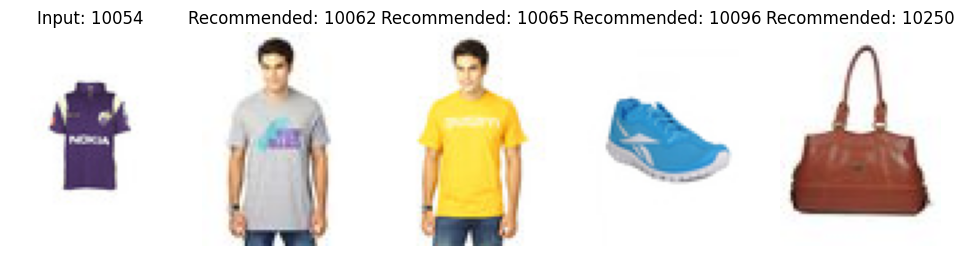

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images(input_image_id, recommended_image_ids, image_mapping):
    plt.figure(figsize=(12, 6))

    # Display Input Image
    if input_image_id in image_mapping:
        input_image_path = os.path.join("images", image_mapping[input_image_id])
        if os.path.exists(input_image_path):
            img_input = mpimg.imread(input_image_path)
            plt.subplot(1, len(recommended_image_ids) + 1, 1)
            plt.imshow(img_input)
            plt.title(f"Input: {input_image_id}")
            plt.axis("off")
        else:
            print(f"Input Image Not Found: {input_image_path}")
    else:
        print(f"No filename found for image_id {input_image_id}")

    # Display Recommended Images
    for i, rec_id in enumerate(recommended_image_ids):
        if rec_id in image_mapping:
            rec_image_path = os.path.join("images", image_mapping[rec_id])
            plt.subplot(1, len(recommended_image_ids) + 1, i + 2)
            if os.path.exists(rec_image_path):
                img = mpimg.imread(rec_image_path)
                plt.imshow(img)
                plt.title(f"Recommended: {rec_id}")
            else:
                print(f"Image Not Found: {rec_image_path}")
                plt.text(0.5, 0.5, "Image Not Found", fontsize=12, ha='center', va='center')
            plt.axis("off")
        else:
            print(f"No filename found for image_id {rec_id}")

    plt.show()

# Example usage
input_image_id = 10054  # Use a valid image_id from metadata
recommended_image_ids = [10062, 10065, 10096, 10250]  # Adjust based on recommendations

display_images(input_image_id, recommended_image_ids, image_mapping)


In [12]:
print(image_mapping.get(10054, "Not found"))  # Replace with a valid image_id


10054.jpg


In [13]:
TOPWEAR = {"t-shirt", "shirt", "hoodie", "sweater", "jacket", "kurta", "jersey"}
BOTTOMWEAR = {"jeans", "trousers", "shorts", "skirts", "leggings", "trackpants"}
ACCESSORIES = {"shoes", "watch", "sunglasses", "bag", "cap", "belt"}


In [14]:
import random

def get_matching_recommendations(input_image_id, metadata, image_mapping):
    # Get input image details
    input_row = metadata[metadata["image_id"] == input_image_id]
    if input_row.empty:
        print(f"No metadata found for image_id {input_image_id}")
        return []
    
    input_category = input_row["category"].values[0]

    # Determine matching categories
    if input_category in TOPWEAR:
        match_categories = BOTTOMWEAR.union(ACCESSORIES)  # Bottomwear + Accessories
    elif input_category in BOTTOMWEAR:
        match_categories = TOPWEAR.union(ACCESSORIES)  # Topwear + Accessories
    elif input_category in ACCESSORIES:
        match_categories = TOPWEAR.union(BOTTOMWEAR)  # Topwear + Bottomwear
    else:
        print(f"Unknown category: {input_category}")
        return []

    # Get all matching items
    matching_items = metadata[metadata["category"].isin(match_categories)]["image_id"].tolist()

    # Pick 3 random recommendations
    recommendations = random.sample(matching_items, min(3, len(matching_items)))

    return recommendations


No metadata found for image_id 14293


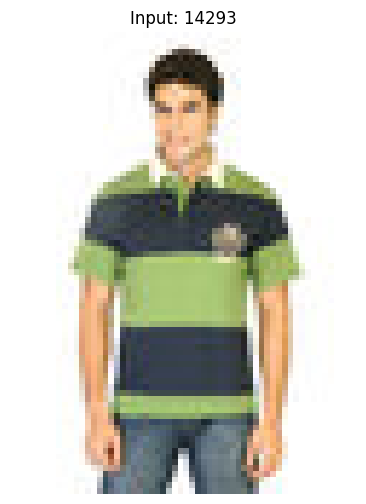

In [16]:
# Get recommendations
input_image_id = 14293 # Example input
recommended_image_ids = get_matching_recommendations(input_image_id, metadata, image_mapping)

# Display images
display_images(input_image_id, recommended_image_ids, image_mapping)


In [17]:
print(metadata.head())  # Check the first few rows
print(metadata[metadata["image_id"] == 10054])  # Should return exactly one row


   image_id          category  color
0         0            jersey      1
1         1  bulletproof_vest      1
2         2          bearskin      1
3         3              clog      0
4         4           mailbag      1
Empty DataFrame
Columns: [image_id, category, color]
Index: []


In [18]:
def get_matching_recommendations(image_id, metadata, image_mapping):
    print(f"Looking for recommendations for {image_id}")  # Debug

    # Fetch metadata for the input image
    row = metadata[metadata["image_id"] == image_id]
    if row.empty:
        print(f"⚠️ No metadata found for image_id {image_id}")  # Debug message
        return []

    category = row["category"].values[0]
    color = row["color"].values[0]
    print(f"Category: {category}, Color: {color}")  # Debug

    # Fetch all matching items (bottomwear + accessories for topwear)
    if "topwear" in category:
        matches = metadata[metadata["category"].str.contains("bottomwear|accessories")]
    elif "bottomwear" in category:
        matches = metadata[metadata["category"].str.contains("topwear|accessories")]
    else:
        matches = metadata  # Default case

    print(f"Found {len(matches)} potential matches")  # Debug

    return matches["image_id"].tolist()[:4]  # Return top 4 matches


In [19]:
recommended_image_ids = get_matching_recommendations(10054, metadata, image_mapping)
print(recommended_image_ids)


Looking for recommendations for 10054
⚠️ No metadata found for image_id 10054
[]


In [20]:
metadata["image_id"] = metadata["image_id"].astype(int)  # Ensure all IDs are integers


In [21]:
print(metadata.dtypes)  # Check column types
print(metadata[metadata["image_id"] == 10054])  # Should return exactly one row


image_id     int64
category    object
color        int64
dtype: object
Empty DataFrame
Columns: [image_id, category, color]
Index: []


In [22]:
print(metadata[metadata["image_id"].astype(str).str.contains("10054", na=False)])


Empty DataFrame
Columns: [image_id, category, color]
Index: []


In [25]:
import os
import pandas as pd

# Load metadata
metadata_path = "updated_metadata.csv"  # Change this if needed
metadata = pd.read_csv(metadata_path)

# Convert image_id column to string for comparison
metadata["image_id"] = metadata["image_id"].astype(str)

# Get all image filenames in your dataset folder (assuming they are named like '10054.jpg')
image_folder = "images"  # Change this to your actual image folder
all_images = {f.split(".")[0] for f in os.listdir(image_folder) if f.endswith(".jpg")}

# Find missing images (present in dataset but missing in metadata)
missing_images = all_images - set(metadata["image_id"])

# If missing images are found, add them with default values
if missing_images:
    new_rows = pd.DataFrame({
        "image_id": list(missing_images),
        "category": ["unknown"] * len(missing_images),  # Default category (change if needed)
        "color": [-1] * len(missing_images)  # Default color value (change if needed)
    })
    
    # Append and save the updated metadata
    metadata = pd.concat([metadata, new_rows], ignore_index=True)
    metadata.to_csv(metadata_path, index=False)
    print(f"✅ Added {len(missing_images)} missing images to metadata.csv")
else:
    print("✅ No missing images found. Metadata is complete.")


✅ Added 958 missing images to metadata.csv


In [26]:
import os
import pandas as pd

# Load metadata
metadata_path = "updated_metadata.csv"  # Adjust if needed
metadata = pd.read_csv(metadata_path)

# Load existing image files in your dataset folder
image_folder = "images"  # Adjust if needed
existing_images = set(os.listdir(image_folder))

# Identify missing images in metadata
metadata["image_id"] = metadata["image_id"].astype(str)  # Ensure str comparison
metadata_images = set(metadata["image_id"] + ".jpg")

missing_images = existing_images - metadata_images

# Auto-assign category based on filename if possible
def guess_category(image_name):
    name = image_name.lower()
    if "jean" in name or "pant" in name or "trouser" in name:
        return "bottomwear"
    elif "shirt" in name or "tee" in name or "jacket" in name:
        return "topwear"
    elif "shoe" in name or "sandal" in name:
        return "footwear"
    elif "bag" in name:
        return "accessory"
    elif "hat" in name or "cap" in name:
        return "headwear"
    else:
        return "unknown"  # Fallback

# Create new rows for missing images
new_rows = []
for image in missing_images:
    image_id = image.split(".")[0]  # Remove extension
    category = guess_category(image)
    new_rows.append({"image_id": image_id, "category": category, "color": -1})  # Color remains unknown

# Append to metadata and save
new_metadata = pd.concat([metadata, pd.DataFrame(new_rows)], ignore_index=True)
new_metadata.to_csv(metadata_path, index=False)

print(f"✅ Auto-filled categories for {len(new_rows)} images! 🚀")


✅ Auto-filled categories for 0 images! 🚀


In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model

# Load metadata
metadata_path = "updated_metadata.csv"  # Adjust if needed
metadata = pd.read_csv(metadata_path)
metadata["image_id"] = metadata["image_id"].astype(str)

# Load existing image files in your dataset folder
image_folder = "images"  # Adjust if needed
existing_images = set(os.listdir(image_folder))

# Identify missing images
metadata_images = set(metadata["image_id"] + ".jpg")
missing_images = existing_images - metadata_images

if not missing_images:
    print("✅ No missing images to process!")
    exit()

# Load CNN model for feature extraction
base_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from an image
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # ResNet input size
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return model.predict(img).flatten()

# Extract features for all labeled images
feature_dict = {}
for _, row in metadata.iterrows():
    image_path = os.path.join(image_folder, row["image_id"] + ".jpg")
    if os.path.exists(image_path):
        feature_dict[row["image_id"]] = extract_features(image_path)

# Extract features for missing images and match with the closest known image
new_rows = []
for image in missing_images:
    image_id = image.split(".")[0]
    image_path = os.path.join(image_folder, image)
    
    # Extract features for missing image
    missing_features = extract_features(image_path)
    
    # Find the closest match using cosine similarity
    best_match = None
    best_similarity = -1
    for known_id, known_features in feature_dict.items():
        similarity = np.dot(missing_features, known_features) / (
            np.linalg.norm(missing_features) * np.linalg.norm(known_features)
        )
        if similarity > best_similarity:
            best_similarity = similarity
            best_match = known_id

    if best_match:
        matched_row = metadata[metadata["image_id"] == best_match].iloc[0]
        new_rows.append({
            "image_id": image_id,
            "category": matched_row["category"],
            "color": matched_row["color"]
        })

# Append new rows and save
if new_rows:
    new_metadata = pd.concat([metadata, pd.DataFrame(new_rows)], ignore_index=True)
    new_metadata.to_csv(metadata_path, index=False)
    print(f"✅ Auto-filled categories & colors for {len(new_rows)} images! 🚀")
else:
    print("⚠️ No matches found for missing images.")


✅ No missing images to process!
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

: 

In [1]:
import os

image_folder = "images/"
all_images = os.listdir(image_folder)
print(all_images[:10])  # Show first 10 images


['10054.jpg', '10062.jpg', '10065.jpg', '10096.jpg', '10250.jpg', '10257.jpg', '10259.jpg', '10266.jpg', '10268.jpg', '10292.jpg']


In [2]:
import pickle

# Load metadata
with open("updated_metadata.pkl", "rb") as f:
    metadata = pickle.load(f)

# Check if metadata is loaded correctly
print(metadata.head())


                  category  color
image_id                         
0                   jersey      1
1         bulletproof_vest      1
2                 bearskin      1
3                     clog      0
4                  mailbag      1


In [3]:
# Assuming you already have a function like get_recommendations(image_id)
input_image_id = "10096"  # Replace with your chosen image_id

recommended_ids = get_recommendations(input_image_id)

print("Recommended Image IDs:", recommended_ids)


NameError: name 'get_recommendations' is not defined

In [4]:
try:
    print(get_recommendations)
except NameError:
    print("Function 'get_recommendations' is not defined.")


Function 'get_recommendations' is not defined.


In [6]:
import pickle
import numpy as np

# Load precomputed feature vectors and metadata
with open("updated_metadata.pkl", "rb") as f:
    metadata = pickle.load(f)

with open("image_features.pkl", "rb") as f:
    image_features = pickle.load(f)

# Convert dictionary to list for easier access
image_ids = list(image_features.keys())
feature_vectors = np.array(list(image_features.values()))

# Function to find similar images
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(input_image_id, top_n=5):
    if input_image_id not in image_features:
        print(f"Image ID {input_image_id} not found in dataset.")
        return []

    # Extract feature vector for the input image
    input_vector = image_features[input_image_id].reshape(1, -1)

    # Compute similarity with all other images
    similarities = cosine_similarity(input_vector, feature_vectors)[0]

    # Get top N most similar images (excluding itself)
    sorted_indices = np.argsort(similarities)[::-1]  # Descending order
    recommended_images = [image_ids[i] for i in sorted_indices if image_ids[i] != input_image_id][:top_n]

    return recommended_images


In [10]:
input_image_id = "10054"  # Replace with your chosen image_id

recommended_ids = get_recommendations(input_image_id)

print("Recommended Image IDs:", recommended_ids)


Recommended Image IDs: ['34038', '34031', '34036', '40978', '33489']


Input Image:


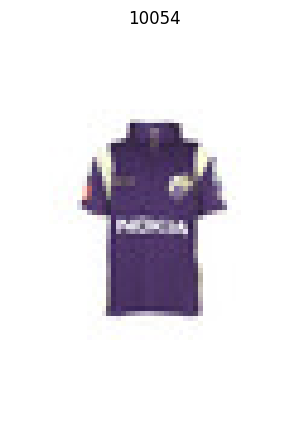

Recommended Images:


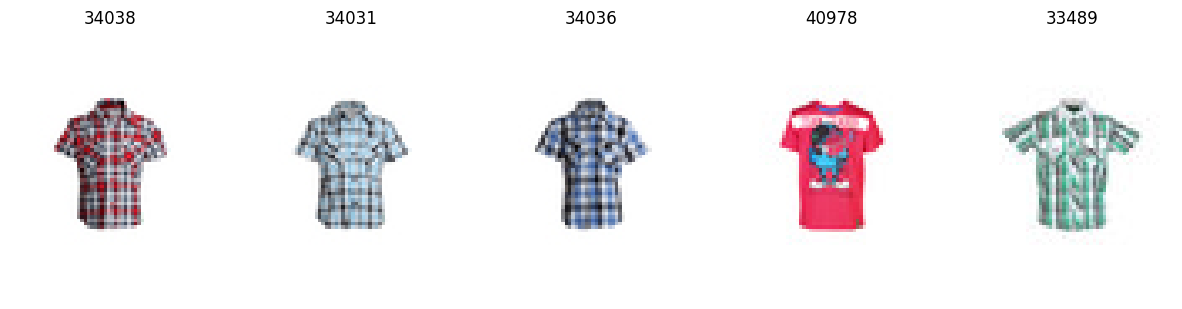

In [11]:
import matplotlib.pyplot as plt
import cv2

def show_images(image_ids):
    plt.figure(figsize=(15,5))

    for i, img_id in enumerate(image_ids):
        img_path = f"images/{img_id}.jpg"
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, len(image_ids), i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_id)

    plt.show()

# Display input image
print("Input Image:")
show_images([input_image_id])

# Display recommended images
print("Recommended Images:")
show_images(recommended_ids)


In [6]:
import pandas as pd

# Load styles_1000.csv
styles = pd.read_csv("styles_1000.csv")

# Print column names
print("Columns in styles_1000.csv:", styles.columns)


Columns in styles_1000.csv: Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [7]:
import pandas as pd

# Load styles_1000.csv
styles = pd.read_csv("styles_1000.csv")

# Rename 'id' to 'image_id'
styles.rename(columns={"id": "image_id"}, inplace=True)

# Load metadata.csv
metadata = pd.read_csv("updated_metadata.csv")

# Merge gender into metadata
metadata = metadata.merge(styles[['image_id', 'gender']], on="image_id", how="left")

# Save the updated metadata.csv
metadata.to_csv("updated_metadata.csv", index=False)

print("✅ Gender added to metadata.csv successfully!")


✅ Gender added to metadata.csv successfully!


In [8]:
import pandas as pd
import random

# Load metadata with gender
metadata = pd.read_csv("updated_metadata.csv")

# Define light and dark colors
light_colors = ["White", "Beige", "Light Yellow", "Light Blue", "Light Grey", "Pastel"]
dark_colors = ["Black", "Navy Blue", "Dark Brown", "Charcoal", "Maroon", "Dark Green"]

# Function to get contrasting color category
def get_contrast_color(color):
    if color in light_colors:
        return "dark"
    else:
        return "light"

# Function to get recommendations
def get_recommendations(image_id):
    # Get input image details
    input_item = metadata[metadata["image_id"] == image_id]
    if input_item.empty:
        print("❌ Image ID not found in metadata!")
        return []

    input_category = input_item["category"].values[0]
    input_color = input_item["color"].values[0]
    input_gender = input_item["gender"].values[0]
    
    contrast = get_contrast_color(input_color)

    # Define matching categories
    if "Topwear" in input_category:
        target_categories = ["Bottomwear", "Accessories"]
    elif "Bottomwear" in input_category:
        target_categories = ["Topwear", "Accessories"]
    elif "Accessories" in input_category:
        target_categories = ["Topwear", "Bottomwear"]
    else:
        return []

    # Filter matching items by gender and category
    filtered_items = metadata[(metadata["category"].isin(target_categories)) & 
                              (metadata["gender"] == input_gender)]

    # Apply contrast matching
    if contrast == "light":
        filtered_items = filtered_items[filtered_items["color"].isin(dark_colors)]
    else:
        filtered_items = filtered_items[filtered_items["color"].isin(light_colors)]

    # Get top 5 recommendations
    recommended_items = filtered_items.sample(n=5, random_state=42) if not filtered_items.empty else []
    
    return recommended_items["image_id"].tolist()

# Example Test
test_image_id = 10054  # Change to any valid image_id
recommendations = get_recommendations(test_image_id)

print("🎯 Recommended Image IDs:", recommendations)


🎯 Recommended Image IDs: []


In [10]:
import pandas as pd
import random

# Load metadata
metadata = pd.read_csv("updated_metadata.csv")

# Define light and dark colors
light_colors = ["White", "Beige", "Light Yellow", "Light Blue", "Light Grey", "Pastel"]
dark_colors = ["Black", "Navy Blue", "Dark Brown", "Charcoal", "Maroon", "Dark Green"]

# Function to determine contrast category
def get_contrast_color(color):
    if color in light_colors:
        return "dark"
    elif color in dark_colors:
        return "light"
    else:
        return "any"  # For colors that don’t fit neatly into light/dark

# Function to get recommendations
def get_recommendations(image_id):
    # Get input image details
    input_item = metadata[metadata["image_id"] == image_id]
    
    # 🛑 Debugging: Check if input_item is empty
    if input_item.empty:
        print(f"❌ Error: Image ID {image_id} not found in metadata!")
        return []

    print("✅ Found Input Image:", input_item)

    input_category = input_item["category"].values[0]
    input_color = input_item["color"].values[0]
    input_gender = input_item["gender"].values[0]
    
    contrast = get_contrast_color(input_color)

    # Define matching categories
    if "Topwear" in input_category:
        target_categories = ["Bottomwear", "Accessories"]
    elif "Bottomwear" in input_category:
        target_categories = ["Topwear", "Accessories"]
    elif "Accessories" in input_category:
        target_categories = ["Topwear", "Bottomwear"]
    else:
        return []

    # Filter by category and gender
    filtered_items = metadata[(metadata["category"].isin(target_categories)) & 
                              (metadata["gender"] == input_gender)]

    print("🛠 Matching Items Before Contrast Filter:", len(filtered_items))

    # Apply contrast matching
    if contrast in ["light", "dark"]:
        filtered_items_contrast = filtered_items[filtered_items["color"].isin(dark_colors if contrast == "light" else light_colors)]
        if not filtered_items_contrast.empty:
            filtered_items = filtered_items_contrast

    print("🎯 Matching Items After Contrast Filter:", len(filtered_items))

    # Get top 5 recommendations (if available, else return all)
    recommended_items = filtered_items.sample(n=min(5, len(filtered_items)), random_state=42)
    
    return recommended_items["image_id"].tolist()

# Example Test
test_image_id = 10054  # Change this to a valid image_id from your dataset
recommendations = get_recommendations(test_image_id)

print("🎯 Recommended Image IDs:", recommendations)


✅ Found Input Image:       image_id category  color gender
1279     10054  unknown     -1   Boys
🎯 Recommended Image IDs: []


In [11]:
import pandas as pd
import random

# Load metadata
metadata = pd.read_csv("updated_metadata.csv")

# Define light and dark colors
light_colors = ["White", "Beige", "Light Yellow", "Light Blue", "Light Grey", "Pastel"]
dark_colors = ["Black", "Navy Blue", "Dark Brown", "Charcoal", "Maroon", "Dark Green"]

# Function to determine contrast category
def get_contrast_color(color):
    if color in light_colors:
        return "dark"
    elif color in dark_colors:
        return "light"
    else:
        return "any"  # For colors that don’t fit neatly into light/dark

# Function to get recommendations
def get_recommendations(image_id):
    # Get input image details
    input_item = metadata[metadata["image_id"] == image_id]

    # 🛑 Debug: Check if input_item is empty
    if input_item.empty:
        print(f"❌ Error: Image ID {image_id} not found in metadata!")
        return []

    # Extract values safely
    input_category = input_item["category"].values[0]
    input_color = input_item["color"].values[0]
    input_gender = input_item["gender"].values[0]

    # 🚨 Skip if category or color is missing
    if input_category == "unknown" or input_color == "-1":
        print(f"⚠️ Skipping Image ID {image_id} due to missing category or color!")
        return []

    # Determine contrast
    contrast = get_contrast_color(input_color)

    # Define matching categories
    if "Topwear" in input_category:
        target_categories = ["Bottomwear", "Accessories"]
    elif "Bottomwear" in input_category:
        target_categories = ["Topwear", "Accessories"]
    elif "Accessories" in input_category:
        target_categories = ["Topwear", "Bottomwear"]
    else:
        return []

    # Filter by category and gender
    filtered_items = metadata[(metadata["category"].isin(target_categories)) & 
                              (metadata["gender"] == input_gender)]

    print("🛠 Matching Items Before Contrast Filter:", len(filtered_items))

    # Apply contrast matching
    if contrast in ["light", "dark"]:
        filtered_items_contrast = filtered_items[filtered_items["color"].isin(dark_colors if contrast == "light" else light_colors)]
        if not filtered_items_contrast.empty:
            filtered_items = filtered_items_contrast

    print("🎯 Matching Items After Contrast Filter:", len(filtered_items))

    # Get top 5 recommendations (if available, else return all)
    recommended_items = filtered_items.sample(n=min(5, len(filtered_items)), random_state=42)

    return recommended_items["image_id"].tolist()

# Example Test
test_image_id = 10054  # Change this to a valid image_id from your dataset
recommendations = get_recommendations(test_image_id)

print("🎯 Recommended Image IDs:", recommendations)


⚠️ Skipping Image ID 10054 due to missing category or color!
🎯 Recommended Image IDs: []


In [12]:
import pandas as pd

# Load metadata
metadata = pd.read_csv("updated_metadata.csv")

# Check how many images have missing categories or colors
missing_data = metadata[(metadata["category"] == "unknown") | (metadata["color"] == "-1")]

print(f"⚠️ Total Images with Missing Metadata: {len(missing_data)}")
print(missing_data.head())  # Show first few rows


⚠️ Total Images with Missing Metadata: 958
     image_id category  color gender
958     20063  unknown     -1  Women
959     16508  unknown     -1    Men
960     20251  unknown     -1    Men
961     10866  unknown     -1    Men
962     21510  unknown     -1  Women


In [13]:
# Remove rows with missing category or color
metadata_cleaned = metadata[(metadata["category"] != "unknown") & (metadata["color"] != "-1")]

# Save the cleaned version
metadata_cleaned.to_csv("cleaned_metadata.csv", index=False)

print("✅ Cleaned metadata.csv saved successfully!")


✅ Cleaned metadata.csv saved successfully!


In [14]:
# Load styles_1000.csv (which has full categories)
styles = pd.read_csv("styles_1000.csv")

# Merge categories from styles_1000.csv into metadata
metadata = metadata.merge(styles[['id', 'masterCategory', 'baseColour']], left_on="image_id", right_on="id", how="left")

# Fill missing categories
metadata["category"] = metadata["category"].fillna(metadata["masterCategory"])
metadata["color"] = metadata["color"].fillna(metadata["baseColour"])

# Remove unnecessary columns
metadata.drop(columns=["id", "masterCategory", "baseColour"], inplace=True)

# Save the cleaned metadata separately
metadata.to_csv("cleaned_metadata.csv", index=False)

print("✅ Missing categories and colors filled successfully in cleaned_metadata.csv!")


✅ Missing categories and colors filled successfully in cleaned_metadata.csv!


In [15]:
import pandas as pd

metadata = pd.read_csv("cleaned_metadata.csv")

missing_data = metadata[(metadata["category"].isna()) | (metadata["color"].isna())]
print(f"⚠️ Total Images with Missing Metadata: {len(missing_data)}")


⚠️ Total Images with Missing Metadata: 0


In [16]:
import pandas as pd

# Load cleaned metadata
metadata = pd.read_csv("cleaned_metadata.csv")

# Pick an input image
input_image_id = "10054"  # Replace with a valid image ID

# Find the input image details
input_data = metadata[metadata["image_id"] == int(input_image_id)]
print("✅ Found Input Image:\n", input_data)


✅ Found Input Image:
       image_id category  color gender
1279     10054  unknown     -1   Boys


In [17]:
import pandas as pd

# Load styles_1000.csv
styles = pd.read_csv("styles_1000.csv")

# Check if 10054 exists in styles_1000.csv
image_data = styles[styles["id"] == 10054]
print(image_data)


        id gender masterCategory subCategory articleType baseColour  season  \
916  10054   Boys        Apparel     Topwear     Tshirts       Blue  Summer   

       year   usage                          productDisplayName  
916  2011.0  Sports  Reebok Kids Kkr Boy's Premium Blue Jerseys  


In [18]:
import pandas as pd

# Load metadata.csv (current version)
metadata = pd.read_csv("cleaned_metadata.csv")

# Load styles_1000.csv (which has correct categories)
styles = pd.read_csv("styles_1000.csv")

# Merge categories and colors from styles_1000.csv into metadata
metadata = metadata.merge(styles[['id', 'masterCategory', 'baseColour']], 
                          left_on="image_id", right_on="id", how="left")

# Fill missing values in metadata
metadata["category"] = metadata["category"].where(metadata["category"] != "unknown", metadata["masterCategory"])
metadata["color"] = metadata["color"].where(metadata["color"] != "-1", metadata["baseColour"])

# Drop unnecessary columns
metadata.drop(columns=["id", "masterCategory", "baseColour"], inplace=True)

# Save the fixed metadata
metadata.to_csv("cleaned_metadata.csv", index=False)

print("✅ Fixed: Categories and colors updated in cleaned_metadata.csv!")


✅ Fixed: Categories and colors updated in cleaned_metadata.csv!


In [19]:
metadata = pd.read_csv("cleaned_metadata.csv")
print(metadata[metadata["image_id"] == 10054])


      image_id category  color gender
1279     10054  Apparel     -1   Boys


In [20]:
import pandas as pd

# Load cleaned metadata
metadata = pd.read_csv("cleaned_metadata.csv")

# Load styles_1000.csv (which has correct colors)
styles = pd.read_csv("styles_1000.csv")

# Merge baseColour from styles_1000.csv
metadata = metadata.merge(styles[['id', 'baseColour']], left_on="image_id", right_on="id", how="left")

# Fix missing colors
metadata["color"] = metadata["color"].where(metadata["color"] != "-1", metadata["baseColour"])

# Drop extra column
metadata.drop(columns=["id", "baseColour"], inplace=True)

# Save the final cleaned metadata
metadata.to_csv("cleaned_metadata.csv", index=False)

print("✅ Fixed: Colors updated in cleaned_metadata.csv!")


✅ Fixed: Colors updated in cleaned_metadata.csv!


In [21]:
metadata = pd.read_csv("cleaned_metadata.csv")
print(metadata[metadata["image_id"] == 10054])


      image_id category  color gender
1279     10054  Apparel     -1   Boys


In [22]:
import pandas as pd

# Load styles_1000.csv
styles = pd.read_csv("styles_1000.csv")

# Check if image_id 10054 exists and has a valid color
print(styles[styles["id"] == 10054])


        id gender masterCategory subCategory articleType baseColour  season  \
916  10054   Boys        Apparel     Topwear     Tshirts       Blue  Summer   

       year   usage                          productDisplayName  
916  2011.0  Sports  Reebok Kids Kkr Boy's Premium Blue Jerseys  


In [23]:
import pandas as pd

# Load cleaned metadata
metadata = pd.read_csv("cleaned_metadata.csv")

# Load styles_1000.csv
styles = pd.read_csv("styles_1000.csv")

# Print column names to verify they match
print("Metadata Columns:", metadata.columns)
print("Styles Columns:", styles.columns)


Metadata Columns: Index(['image_id', 'category', 'color', 'gender'], dtype='object')
Styles Columns: Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [24]:
# Merge baseColour from styles into metadata
metadata = metadata.merge(styles[['id', 'baseColour']], left_on="image_id", right_on="id", how="left")

# If color is missing (-1), replace it with baseColour
metadata["color"] = metadata["color"].where(metadata["color"] != "-1", metadata["baseColour"])

# Drop extra 'id' and 'baseColour' columns
metadata.drop(columns=["id", "baseColour"], inplace=True)

# Save final cleaned metadata
metadata.to_csv("cleaned_metadata.csv", index=False)

print("✅ Color updated in cleaned_metadata.csv successfully!")


✅ Color updated in cleaned_metadata.csv successfully!


In [25]:
metadata = pd.read_csv("cleaned_metadata.csv")

# Show details for image_id 10054
print(metadata[metadata["image_id"] == 10054])


      image_id category  color gender
1279     10054  Apparel     -1   Boys


In [26]:
print(metadata[metadata["image_id"] == 10054])


      image_id category  color gender
1279     10054  Apparel     -1   Boys


In [27]:
metadata = metadata.fillna("Unknown")


In [28]:
import pandas as pd

# Load metadata
metadata = pd.read_csv("final_metadata_with_gender.csv")

# Load styles_1000.csv
styles = pd.read_csv("styles_1000.csv")

# Drop any duplicate gender columns
metadata = metadata.drop(columns=["gender_x", "gender_y"], errors="ignore")

# Merge gender correctly
metadata = metadata.merge(styles[['id', 'gender']], left_on="image_id", right_on="id", how="left")

# Remove unnecessary 'id' column
metadata.drop(columns=["id"], inplace=True)

# Save cleaned metadata
metadata.to_csv("final_metadata_proper.csv", index=False)

print("✅ Gender column fixed and saved as 'final_metadata_proper.csv'.")


✅ Gender column fixed and saved as 'final_metadata_proper.csv'.


In [29]:
import pandas as pd

# Load the fixed metadata file
metadata = pd.read_csv("final_metadata_proper.csv")

# Count missing values
missing_counts = metadata[['category', 'color', 'gender']].isnull().sum()

print("🔍 Missing Values Check:")
print(missing_counts)


🔍 Missing Values Check:
category      0
color         0
gender      958
dtype: int64


In [30]:
# Check for invalid values
invalid_values = metadata[(metadata['category'].isin(["unknown", "-1"])) |
                          (metadata['color'].isin(["unknown", "-1"])) |
                          (metadata['gender'].isin(["unknown", "-1"]))]

print(f"⚠️ Total Rows with Invalid Values: {len(invalid_values)}")


⚠️ Total Rows with Invalid Values: 0


In [31]:
# Show a sample of 10 random rows
print(metadata.sample(10))


      image_id      category  color gender
1561     28467       Apparel     -1  Women
486        486  analog_clock      1    NaN
1173     40971      Footwear     -1    Men
1671     38630       Apparel     -1  Women
919        919        jersey      0    NaN
183        183    sweatshirt      2    NaN
966      20055   Accessories     -1  Women
1503     11340       Apparel     -1    Men
1302      6617       Apparel     -1    Men
235        235       mailbag      0    NaN


In [32]:
import pandas as pd

# Load metadata and styles data
metadata = pd.read_csv("cleaned_metadata.csv")
styles = pd.read_csv("styles_1000.csv")

# Display first few rows
metadata.head(), styles.head()


(   image_id          category  color gender
 0         0            jersey      1    NaN
 1         1  bulletproof_vest      1    NaN
 2         2          bearskin      1    NaN
 3         3              clog      0    NaN
 4         4           mailbag      1    NaN,
       id gender masterCategory subCategory  articleType baseColour  season  \
 0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
 1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
 2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
 3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
 4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
 
      year   usage                             productDisplayName  
 0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
 1  2012.0  Casual             Peter England Men Party Blue Jeans  
 2  2016.0  Casual                       Titan Wo

In [33]:
# Check if any color values are -1
print("⚠️ Missing Colors:", metadata[metadata["color"] == -1].shape[0])

# Check if gender column has NaN values
print("⚠️ Missing Genders:", metadata["gender"].isna().sum())


⚠️ Missing Colors: 958
⚠️ Missing Genders: 958


In [34]:
import pandas as pd

# Load metadata and styles data
metadata = pd.read_csv("cleaned_metadata.csv")
styles = pd.read_csv("styles_1000.csv")

# Display dataset info to check column names
metadata.info(), styles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  1916 non-null   int64 
 1   category  1916 non-null   object
 2   color     1916 non-null   int64 
 3   gender    958 non-null    object
dtypes: int64(2), object(2)
memory usage: 60.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  958 non-null    int64  
 1   gender              958 non-null    object 
 2   masterCategory      958 non-null    object 
 3   subCategory         958 non-null    object 
 4   articleType         958 non-null    object 
 5   baseColour          958 non-null    object 
 6   season              957 non-null    object 
 7   year                958 non-null    float64
 8   usage          

(None, None)

In [35]:
# Rename 'id' to 'image_id' and 'baseColour' to 'color' for correct merging
styles.rename(columns={"id": "image_id", "baseColour": "color"}, inplace=True)


In [36]:
# Merge metadata with styles on image_id
merged = metadata.merge(styles[['image_id', 'gender', 'color']], on="image_id", how="left")

# Fill missing values
merged["gender"] = merged["gender"].fillna(styles["gender"])
merged["color"] = merged["color"].fillna(styles["color"])

# Save cleaned data
merged.to_csv("final_cleaned_metadata.csv", index=False)
print("✅ Data cleaned and saved successfully!")


KeyError: 'gender'

In [37]:
print("metadata columns:", metadata.columns)
print("styles columns:", styles.columns)


metadata columns: Index(['image_id', 'category', 'color', 'gender'], dtype='object')
styles columns: Index(['image_id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'color', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [38]:
print(styles.dtypes)  # Check data types
print(styles.isnull().sum())  # Check missing values


image_id                int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
color                  object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object
image_id               0
gender                 0
masterCategory         0
subCategory            0
articleType            0
color                  0
season                 1
year                   0
usage                 11
productDisplayName     0
dtype: int64


In [39]:
# Merge styles into metadata
merged = metadata.merge(styles[['image_id', 'gender', 'color']], on="image_id", how="left")

# Force gender to exist (in case of weird index issues)
if 'gender' not in merged.columns:
    merged['gender'] = None  # Add empty gender column if missing

# Fill missing values
merged["gender"] = merged["gender"].fillna(styles.set_index("image_id").loc[merged["image_id"], "gender"].values)
merged["color"] = merged["color"].fillna(styles.set_index("image_id").loc[merged["image_id"], "color"].values)

# Verify fixes
print(merged[['image_id', 'gender', 'color']].head())
print("Missing genders:", merged['gender'].isnull().sum())
print("Missing colors:", merged['color'].isnull().sum())


KeyError: '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957] not in index'

In [ ]:
import pandas as pd

# Load metadata and styles data
metadata = pd.read_csv("cleaned_metadata.csv")
styles = pd.read_csv("styles_1000.csv")

# Display first few rows
metadata.head(), styles.head()


(   image_id          category  color gender
 0         0            jersey      1    NaN
 1         1  bulletproof_vest      1    NaN
 2         2          bearskin      1    NaN
 3         3              clog      0    NaN
 4         4           mailbag      1    NaN,
       id gender masterCategory subCategory  articleType baseColour  season  \
 0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
 1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
 2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
 3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
 4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
 
      year   usage                             productDisplayName  
 0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
 1  2012.0  Casual             Peter England Men Party Blue Jeans  
 2  2016.0  Casual                       Titan Wo

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Load updated metadata
metadata_path = "updated_metadata.csv"
metadata = pd.read_csv(metadata_path)

# Load extracted image features
with open("image_features.pkl", "rb") as f:
    image_features = pickle.load(f)

# Function to display images
def show_images(image_ids, title="Recommended Items"):
    plt.figure(figsize=(12, 5))
    for i, img_id in enumerate(image_ids):
        img_path = os.path.join("images", f"{img_id}.jpg")
        img = cv2.imread(img_path)
        if img is None:
            print(f"Image {img_id}.jpg not found!")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(image_ids), i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title, fontsize=14)
    plt.show()

# Recommendation function
def recommend(image_id, top_n=5):
    if image_id not in metadata["image_id"].values:
        print("Image ID not found in metadata!")
        return
    
    if image_id not in image_features:
        print("Image features not found for this ID!")
        return
    
    # Retrieve feature vector for the input image
    input_feature = image_features[image_id].reshape(1, -1)
    
    # Compute cosine similarity with all images
    all_features = np.array(list(image_features.values()))
    similarities = cosine_similarity(input_feature, all_features)[0]
    
    # Add similarity scores to metadata
    metadata["similarity"] = similarities
    
    # Get category and gender of input image
    input_category = metadata.loc[metadata["image_id"] == image_id, "category"].values[0]
    input_gender = metadata.loc[metadata["image_id"] == image_id, "gender"].values[0]
    
    # Filter items with the same category and gender
    filtered_results = metadata[(metadata["category"] == input_category) & 
                                (metadata["gender"] == input_gender)].copy()
    
    # Sort by similarity and get top recommendations
    filtered_results = filtered_results.sort_values(by="similarity", ascending=False)
    recommended_images = filtered_results.iloc[1:top_n+1]["image_id"].values
    
    # Display input and recommended images
    print("Input Image:")
    show_images([image_id], title="Input Image")
    print("Recommended Images:")
    show_images(recommended_images, title="Recommended Items")

# Test recommendation system
sample_id = metadata["image_id"].sample().values[0]
recommend(sample_id)


Image features not found for this ID!


In [44]:
import pandas as pd

# Load the metadata and styles CSV files
metadata = pd.read_csv("updated_metadata.csv")
styles = pd.read_csv("styles_1000.csv")

# Ensure both datasets have the necessary columns
if "image_id" in metadata.columns and "id" in styles.columns and "gender" in styles.columns:
    # Create a mapping of image_id to gender
    gender_mapping = styles.set_index("id")["gender"].to_dict()
    
    # Assign gender values based on the mapping
    metadata["gender"] = metadata["image_id"].map(gender_mapping)
    
    # Fill missing values with 'Unisex' if any IDs were not found
    metadata["gender"].fillna("Unisex", inplace=True)
    
    # Save the updated metadata
    metadata.to_csv("updated_metadata.csv", index=False)
    print("Gender values updated successfully!")
else:
    print("Required columns not found in one of the files.")


Gender values updated successfully!


C:\Users\ajant\AppData\Local\Temp\ipykernel_10092\3898082416.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metadata["gender"].fillna("Unisex", inplace=True)


In [45]:
import pandas as pd

# Load the datasets
metadata = pd.read_csv("updated_metadata.csv")
styles = pd.read_csv("styles_1000.csv")

# Merge gender values from styles_1000.csv based on matching image_id
metadata = metadata.merge(styles[["id", "gender"]], left_on="image_id", right_on="id", how="left")

# Drop the extra 'id' column from styles_1000.csv
metadata.drop(columns=["id"], inplace=True)

# Fill missing gender values with 'Unisex'
metadata["gender"] = metadata["gender"].fillna("Unisex")

# Save the updated metadata file
metadata.to_csv("updated_metadata.csv", index=False)

print("Gender values updated successfully!")


KeyError: 'gender'

In [46]:
import pandas as pd

# Load the datasets
metadata = pd.read_csv("updated_metadata.csv")
styles = pd.read_csv("styles_1000.csv")

# Ensure both columns are of the same data type
metadata["image_id"] = metadata["image_id"].astype(int)
styles["id"] = styles["id"].astype(int)

# Create a mapping from styles_1000.csv
id_to_gender = styles.set_index("id")["gender"].to_dict()

# Assign gender based on matching image_id
metadata["gender"] = metadata["image_id"].map(id_to_gender)

# Fill missing values with "Unisex"
metadata["gender"].fillna("Unisex", inplace=True)

# Save the correctly updated metadata file
metadata.to_csv("updated_metadata.csv", index=False)

print("Gender values updated correctly!")


Gender values updated correctly!


C:\Users\ajant\AppData\Local\Temp\ipykernel_10092\3116200778.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metadata["gender"].fillna("Unisex", inplace=True)


In [2]:
import os
import pandas as pd

# Load dataset
csv_path = "styles_1000.csv"  # Update path if necessary
image_folder = "images"  # Folder containing images

df = pd.read_csv(csv_path)
image_ids = df["id"].astype(str)  # Ensure IDs are strings

# List all image files in the directory
image_files = set(os.listdir(image_folder))
image_files = {os.path.splitext(img)[0] for img in image_files}  # Remove extensions

# Find missing and extra images
missing_images = set(image_ids) - image_files
extra_images = image_files - set(image_ids)

print(f"Total Images in Dataset: {len(image_ids)}")
print(f"Total Images in Folder: {len(image_files)}")
print(f"Missing Images: {len(missing_images)}")
print(f"Extra Images: {len(extra_images)}")

if missing_images:
    print("⚠️ Missing Image IDs:", list(missing_images)[:10])  # Show only first 10
if extra_images:
    print("⚠️ Extra Images (Not in Dataset):", list(extra_images)[:10])


Total Images in Dataset: 958
Total Images in Folder: 958
Missing Images: 0
Extra Images: 0


In [6]:
print(df.columns)  # Check available column names


Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [8]:
import numpy as np

# Improved color groups with more shades
color_groups = {
    "white": ["white", "off-white", "cream"],
    "black": ["black"],
    "red": ["red", "maroon", "dark red", "burgundy"],
    "blue": ["blue", "navy", "light blue", "navy blue", "royal blue"],
    "green": ["green", "olive", "dark green", "forest green"],
    "yellow": ["yellow", "mustard", "gold"],
    "brown": ["brown", "beige", "tan", "chocolate"],
    "gray": ["gray", "grey", "silver"],
    "pink": ["pink", "magenta", "hot pink"],
    "purple": ["purple", "violet", "lavender"],
    "orange": ["orange", "coral"],
}

# Function to standardize colors
def standardize_color(color):
    color = color.lower().strip()
    for group, shades in color_groups.items():
        if any(shade in color for shade in shades):  # Check if the color contains a known shade
            return group
    return "other"  # If color is not in predefined groups

# Apply color standardization using 'baseColour'
df["standard_color"] = df["baseColour"].apply(standardize_color)

# Check results
print(df[["baseColour", "standard_color"]].head())


  baseColour standard_color
0  Navy Blue           blue
1       Blue           blue
2     Silver           gray
3      Black          black
4       Grey           gray


In [1]:
import pickle

# Load metadata.pkl
with open("metadata.pkl", "rb") as f:
    metadata = pickle.load(f)

# Get available image IDs
image_ids = list(metadata.keys())

# Show first 10 IDs
print(image_ids[:10])


FileNotFoundError: [Errno 2] No such file or directory: 'metadata.pkl'

In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv("styles_1000.csv")  # Ensure the file name is correct

# Print available image IDs
print("Available Image IDs:", df["id"].head(10))

# Check if the missing image ID exists
missing_id = 9204  # Change this to the missing ID
if missing_id in df["image_id"].values:
    print(f"✅ Image ID {missing_id} exists in styles_1000.csv")
else:
    print(f"❌ Image ID {missing_id} NOT FOUND in styles_1000.csv")


Available Image IDs: 0    15970
1    39386
2    59263
3    21379
4    53759
5     1855
6    30805
7    26960
8    29114
9    30039
Name: id, dtype: int64


KeyError: 'image_id'

In [4]:
df = pd.read_csv("styles_1000.csv")  # Ensure correct path
df.rename(columns={"id": "image_id"}, inplace=True)
df.to_csv("styles_1000.csv", index=False)  # Save the fixed file
print("✅ Renamed 'id' to 'image_id' and saved the file.")


✅ Renamed 'id' to 'image_id' and saved the file.


In [5]:
df = pd.read_csv("styles_1000.csv")  # Load updated file
print(df.head())  # Ensure "image_id" column exists


   image_id gender masterCategory subCategory  articleType baseColour  season  \
0     15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1     39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2     59263  Women    Accessories     Watches      Watches     Silver  Winter   
3     21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4     53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [7]:
import os
import pandas as pd

# Load the valid image IDs
df = pd.read_csv("styles_1000.csv")  # Ensure the correct path
valid_ids = set(df["image_id"].astype(str))  # Convert IDs to string for matching

# Path to images folder
images_folder = "images"  # Change if needed

# Count files before deletion
total_files = len(os.listdir(images_folder))
print(f"Total images before cleanup: {total_files}")

# Delete images not in styles_1000.csv
deleted_count = 0
for filename in os.listdir(images_folder):
    image_id, ext = os.path.splitext(filename)  # Extract ID
    if image_id not in valid_ids:
        os.remove(os.path.join(images_folder, filename))
        deleted_count += 1

print(f"✅ Deleted {deleted_count} images. Remaining: {total_files - deleted_count}")


Total images before cleanup: 958
✅ Deleted 0 images. Remaining: 958


In [8]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("styles_1000.csv")

# Display column names
print("Columns in styles_1000.csv:", df.columns.tolist())

# Display the first few rows to check data format
print("\nFirst 5 rows:")
print(df.head())


Columns in styles_1000.csv: ['image_id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

First 5 rows:
   image_id gender masterCategory subCategory  articleType baseColour  season  \
0     15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1     39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2     59263  Women    Accessories     Watches      Watches     Silver  Winter   
3     21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4     53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4

In [9]:
import pandas as pd

# Load the CSV file
styles_df = pd.read_csv("styles_1000.csv")

# Ensure all required columns are present
columns_needed = ['image_id', 'gender', 'masterCategory', 'subCategory', 'articleType', 
                  'baseColour', 'season', 'year', 'usage', 'productDisplayName']

# Create metadata dataframe with the same structure
metadata_df = styles_df[columns_needed]

# Save metadata as CSV
metadata_df.to_csv("metadata.csv", index=False)

print("✅ metadata.csv created successfully!")


✅ metadata.csv created successfully!


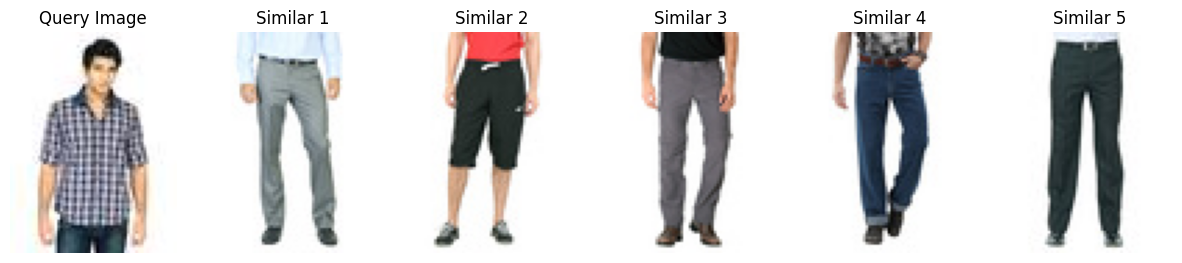

Exiting program. Goodbye! 👋


In [4]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics.pairwise import cosine_similarity

# Load extracted features
with open("image_features.pkl", "rb") as f:
    data = pickle.load(f)

# Convert dictionary keys (image IDs) to strings for consistency
data = {str(k): v for k, v in data.items()}

# Convert dictionary to arrays
image_ids = list(data.keys())  # Ensure all IDs are strings
feature_matrix = np.array(list(data.values()))

# Load metadata
metadata = pd.read_csv("metadata.csv", dtype={"image_id": str})  # Ensure image_id is string
metadata.set_index("image_id", inplace=True)  # Set image_id as index for fast lookup

# Path to images folder
IMAGE_FOLDER = "images"

# Define complementary categories
COMPLEMENTARY_CATEGORIES = {
    "Topwear": ["Bottomwear"],
    "Bottomwear": ["Topwear"],
    "Footwear": ["Bottomwear"],
    "Accessories": ["Topwear", "Bottomwear"],
}

def find_similar(image_id, top_n=5):
    image_id = str(image_id)  # Convert to string for consistency

    if image_id not in data:
        print(f"❌ Image ID {image_id} not found!")
        return []

    # Get query image details
    if image_id not in metadata.index:
        print(f"❌ No metadata found for image ID {image_id}!")
        return []

    query_vector = data[image_id].reshape(1, -1)  # Reshape for similarity comparison
    query_gender = metadata.loc[image_id, "gender"]
    query_category = metadata.loc[image_id, "subCategory"]

    # Get valid image IDs with same gender
    valid_images = metadata[metadata["gender"] == query_gender].index.tolist()

    # If complementary categories exist, prefer those
    preferred_categories = COMPLEMENTARY_CATEGORIES.get(query_category, [])
    preferred_images = metadata[metadata["subCategory"].isin(preferred_categories)].index.tolist()

    # Compute similarities only for valid images
    valid_indices = [image_ids.index(img) for img in valid_images if img in image_ids]
    valid_features = feature_matrix[valid_indices]

    similarities = cosine_similarity(query_vector, valid_features)[0]
    sorted_indices = np.argsort(similarities)[::-1]  # Sort in descending order

    # Get top-N results (prioritize preferred categories)
    similar_images = [valid_images[i] for i in sorted_indices]
    final_results = [img for img in similar_images if img in preferred_images][:top_n]

    # If not enough preferred matches, fill with other same-gender items
    if len(final_results) < top_n:
        remaining = [img for img in similar_images if img not in final_results][:top_n - len(final_results)]
        final_results.extend(remaining)

    return final_results

def show_images(query_id, similar_ids):
    fig, axes = plt.subplots(1, len(similar_ids) + 1, figsize=(15, 5))

    # Load and show query image
    query_img_path = os.path.join(IMAGE_FOLDER, f"{query_id}.jpg")
    if not os.path.exists(query_img_path):
        print(f"❌ Query image {query_id}.jpg not found!")
        return

    query_img = cv2.imread(query_img_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image")
    axes[0].axis("off")

    # Load and show similar images
    for i, sim_id in enumerate(similar_ids):
        sim_img_path = os.path.join(IMAGE_FOLDER, f"{sim_id}.jpg")
        
        if not os.path.exists(sim_img_path):
            print(f"⚠️ Skipping {sim_id}.jpg (Image not found)")
            continue  # Skip missing images
        
        sim_img = cv2.imread(sim_img_path)
        sim_img = cv2.cvtColor(sim_img, cv2.COLOR_BGR2RGB)
        axes[i + 1].imshow(sim_img)
        axes[i + 1].set_title(f"Similar {i+1}")
        axes[i + 1].axis("off")

    plt.show()

if __name__ == "__main__":
    while True:
        test_image_id = input("\nEnter an Image ID (or type 'exit' to quit): ").strip()

        if test_image_id.lower() == "exit":
            print("Exiting program. Goodbye! 👋")
            break

        similar_images = find_similar(test_image_id)

        if similar_images:
            show_images(test_image_id, similar_images)


In [6]:
# Save model data in a dictionary
model_data = {
    "image_ids": image_ids,
    "features": feature_matrix,
    "metadata": metadata.to_dict(),  # Convert metadata to a dictionary
    "complementary_categories": COMPLEMENTARY_CATEGORIES
}

# Save to a pickle file
with open("saved_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("✅ Model saved successfully in saved_model.pkl!")


✅ Model saved successfully in saved_model.pkl!


In [7]:
import pickle

# Load the saved model
with open("saved_model.pkl", "rb") as file:
    model_data = pickle.load(file)

# Check keys inside the model
print("Keys in the saved model:", model_data.keys())

# Verify the shape of the feature matrix
if "features" in model_data:
    print("Feature matrix shape:", model_data["features"].shape)

# Check number of image IDs
if "image_ids" in model_data:
    print("Total images stored:", len(model_data["image_ids"]))

# Check complementary categories
if "complementary_categories" in model_data:
    print("Complementary categories sample:", list(model_data["complementary_categories"].items())[:5])


Keys in the saved model: dict_keys(['image_ids', 'features', 'metadata', 'complementary_categories'])
Feature matrix shape: (958, 512)
Total images stored: 958
Complementary categories sample: [('Topwear', ['Bottomwear']), ('Bottomwear', ['Topwear']), ('Footwear', ['Bottomwear']), ('Accessories', ['Topwear', 'Bottomwear'])]


In [9]:
test_image_id = "43356"  # Replace with an actual image ID from your dataset
similar_images = find_similar(test_image_id)

print("Query Image ID:", test_image_id)
print("Recommended Image IDs:", similar_images)


Query Image ID: 43356
Recommended Image IDs: ['59263', '48911', '6242', '53757', '24605']


d:\MLPROJECT\venv\Lib\site-packages\sklearn\decomposition\_pca.py:789: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


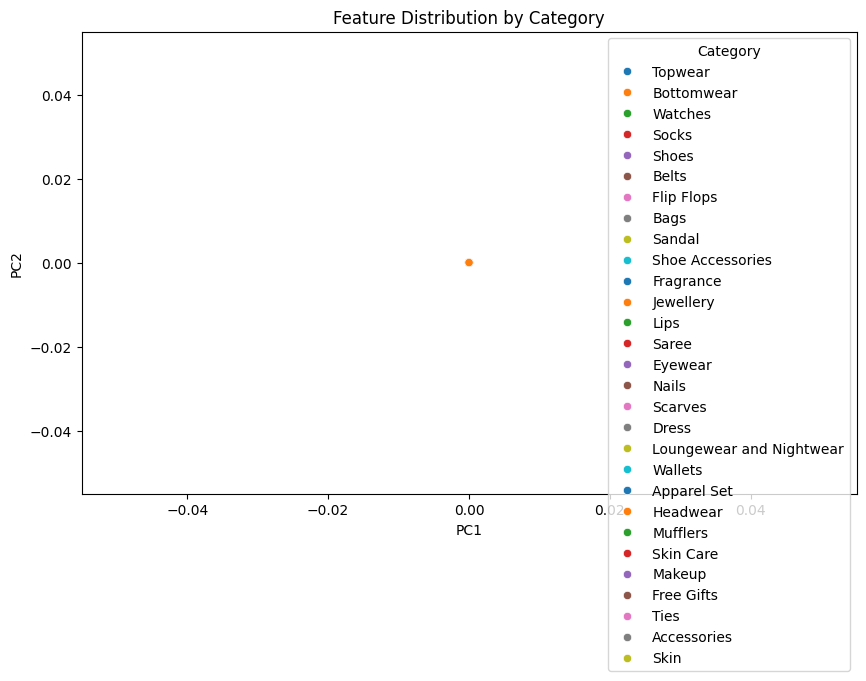

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce feature dimensions (using first 2 principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_matrix)

# Create DataFrame for visualization
feature_df = pd.DataFrame(reduced_features, columns=["PC1", "PC2"])
feature_df["Category"] = metadata["subCategory"].values

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=feature_df, x="PC1", y="PC2", hue="Category", palette="tab10")
plt.title("Feature Distribution by Category")
plt.show()
